In [5]:
import pandas as pd

df = pd.read_csv("data/data_cleaned.csv")
df

,Title
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데...
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...
...,...
9869,평 광파오븐이건 조합원만 주나요지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제...
9870,안녕하십니까 늘 새로운 정보를 가지고오는 전자 구미형곡점 김경민팀장입니다 오늘은 많...
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통...
9872,고민고민하다 세탁실선반에 광파오븐뒀는데 제가 키가작아서 좀불편하기도하고 혹시 부서질...


In [6]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.font_manager as fm

In [7]:
# 형태소 분석기 초기화
okt = Okt()

In [8]:
stopwords_df = pd.read_csv('../ko-stopwords.csv')
stopwords = list(stopwords_df['stopwords'])
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [11]:
#원하는 태그 추출 & 불용어 제거

def okt_pos_tagging(string):  # 사용자 정의 함수, 매개변수 = String
    pos_words = okt.pos(string, stem=True, norm=True)  # pos 함수 : 형태소를 쪼개면서 동시에 품사를 알려준다.

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords:
                if len(word) > 1:
                    if word not in [
                        "광파오븐", "오븐", "광파", "에어", "오브", "프라이어", "컬렉션", "전자", "전자레인지", "레인지",
                        "전자렌지", "엘지", "삼성", "디오스", "프라이", "되어다", "카밍", "에센스", "프라", "아주",
                        "제품원래", "나다", "이기", "에프", "전자", "베이지", "화이트", "냉장고", "식기세척기", "에어컨",
                        "인덕션", "한번", "정도", "유무", "청소기", "진짜", "가장", "김치냉장고", "좋다디자인", "공기청정기",
                        "제품원래", "인버터", "롯데", "밥솥", "싶다", "본점", "받다", "안녕하다", "보다", "써다", "유무",
                        "먹다", "상세", "쓰다", "만들다", "현대", "좋다다양하다", "좋다좋다", "전기레인지", "하이마트",
                        "좋다이벤트", "후기", "구매", "제품", "가전", "상품", "보다", "냉장고", "받다", "방문", "배송",
                        "정보", "베스트", "베이지", "정수기", "식기세척기", "청소기", "확인", "스타", "인덕션", "해보다",
                        "에어컨", "로켓", "타워", "싶다", "세탁기", "오늘", "핫딜", "화이트", "김치냉장고", "정말",
                        "만원", "써다", "한번", "가지", "처음", "로봇청소기", "티비", "밥솥", "에프", "전기포트",
                        "믹서기", "식기건조기", "오븐", "전기그릴", "커피머신", "온풍기", "청소기", "가스레인지",
                        "전기밥솥", "제습기", "선풍기", "히터", "스팀청소기", "전기난로", "냉동고", "가전제품", "다리미", "보온밥솥", "스탠바이", "건조기", "매직",
                        "원래", "육식", "육식맨", "미스트", "아마", "기세", "블랙", "은지", "자꾸", "해주시", "비도", "전이", "해먹", "대다", "렌지",
                        "다가"
                    ]:
                        tagged_list.append(word)
    if len(tagged_list) == 0:
        tagged_list.append("None")
    return tagged_list

In [12]:
#형태소 분리 및 df 적용
tagged_review = []
for review in tqdm(df.Title):
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)
df['tagged_review'] = tagged_review
df = df[~df['tagged_review'].apply(lambda x: "None" in x)]
df

100%|██████████| 9839/9839 [00:51<00:00, 190.73it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_19472\2154284737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tagged_review'] = tagged_review


,Title,tagged_review
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데...,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]"
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서...,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]"
2,월에 캐나다로 갈 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어...,"[캐나다, 갈다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]"
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어...,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다, 쓸다]"
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고...,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨..."
...,...,...
9869,평 광파오븐이건 조합원만 주나요지인이 평 일반분양걸로 계약했다는데 물어보네요 기본제...,"[조합원, 주다, 지인, 분양, 계약, 물어보다, 품목, 없다, 일반, 내부, 직접..."
9870,안녕하십니까 늘 새로운 정보를 가지고오는 전자 구미형곡점 김경민팀장입니다 오늘은 많...,"[안녕하십니까, 새롭다, 가다, 구미, 곡점, 김경민, 많다, 관심, 생각, 비싸다..."
9871,매립된 광파오븐 사용하고 계신가요 전자렌지 돌리면 원래 안에 불없이 돌아가나요 보통...,"[매립, 사용, 계시다, 돌리다, 돌아가다, 보통, 빨갛다, 켜다, 돌다, 가다, ..."
9872,고민고민하다 세탁실선반에 광파오븐뒀는데 제가 키가작아서 좀불편하기도하고 혹시 부서질...,"[고민, 고민, 세탁실, 선반, 두다, 작다, 불편하다, 기도, 부서지다, 걱정, ..."


In [13]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [14]:
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words=token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 9839


In [15]:
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=8)
model.build_vocab(tagged_corpus_list)
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

In [16]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)
df['vector'] = vector_list

100%|██████████| 9839/9839 [00:00<00:00, 427791.44it/s]


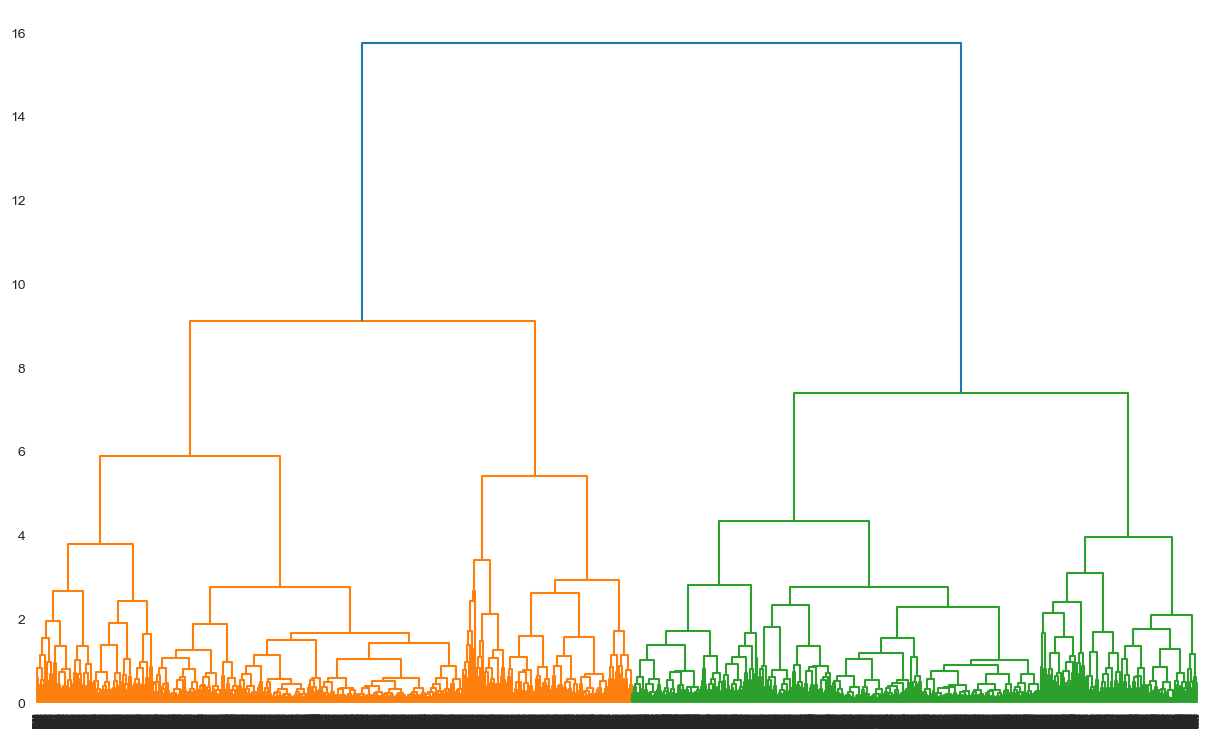

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(15, 9))  #인치
dendrogram(linked,
           orientation='top',  # 위에서부터 아래로
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [18]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))
silhouette_avg = silhouette_score(list(df['vector']), cluster_labels)
silhouette_avg

0.19589403

100%|██████████| 28/28 [02:06<00:00,  4.53s/it]


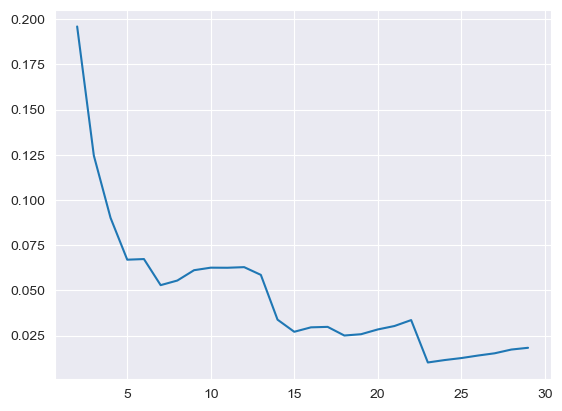

In [19]:
n_clutser = []
clustering_score = []
for i in tqdm(range(2, 30)):  # 군집을 2개부터 29개까지 만들것이다.
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_labels)

    n_clutser.append(i)
    clustering_score.append(score)

plt.plot(n_clutser, clustering_score)

In [20]:
result = pd.DataFrame({'n_cluster': n_clutser, 'score': clustering_score})
result

,n_cluster,score
0,2,0.195894
1,3,0.124535
2,4,0.090123
3,5,0.066989
4,6,0.067339
5,7,0.052922
6,8,0.055472
7,9,0.061180
8,10,0.062581
9,11,0.062533


In [182]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_labels
df.head()

C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\867340467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_labels


,Title,tagged_review,vector,cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.020797942, 0.0034135766, -0.008000808, -0.0017764809, 0.006921907, -0.019937364, -0.0030684688, 0.026051998, -0.018387103, -0.008240109, 0.004564482, -0.00032808015, -0.016603619, 0.005557125, 0.006081177, -0.014421123, 0.007221052, 0.0029406878, -0.010873531, -0.019684158, -0.009755933, -0.0067098606, 0.00022245845, 0.00920576, 0.00010143168, -0.011920954, -0.011746777, -0.028573109, 0.01564139, -0.010340864, 0.02208229, 0.01439745, -0.012972576, -0.0017762056, 0.00010889495, 0.013490171, 0.0063074855, -0.02119862, -0.0012928008, -0.018283233, 0.0052620135, -0.01737321, 0.0066214837, -0.0034741426, 0.017083935, -0.0038907898, -0.00900771, -0.0064373976, 0.0062580896, 0.008289342, -0.0011181751, -0.0033853564, 0.0010352933, 0.008579101, -0.014570687, 0.01578289, 0.0013777512, 0.0028397054, -0.019802934, 0.012671545, 0.009831049, 0.006441448, 0.004752128, 0.0037612917, -0.021262445, -0.0050994502, 0.020149795, 0.011517451, -0.009353718, 0.0045316643, -0.011947125, -0.00020104623, -0.002588084, -0.0018521169, 0.0011964198, 0.0012759119, -0.007827144, -0.0056378874, -0.0063793175, 0.009480956, 0.015024908, 0.0067665144, -0.020040171, 0.0119045805, 0.006433324, 0.003734001, -0.006256812, 0.01288099, 0.016230645, 0.00022107002, 0.010398396, 0.012365399, -0.013266684, -0.00648175, 0.019930962, 0.02474692, 0.008890621, -0.018400703, 0.015084261, -0.0022740976]",0
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 그렇게 추천하는지 찾아봤는데,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.013392268, -0.02819333, -0.010192532, 0.014512931, -0.01728332, 0.027610036, -0.011112106, -0.048134793, 0.019337593, 0.030879376, 0.0072705504, 0.018148202, 0.010384349, -0.017995017, 0.008533982, -0.005665121, -0.010473175, 0.020866161, 0.0029100643, 0.04070185, 0.020270707, 0.009133993, -0.019630156, 0.003783007, 0.00048624177, -0.0007912135, -0.011552719, 0.0102349045, 0.011208989, -0.007935923, -0.033133548, -0.015507953, 0.0016538632, 0.014426522, 0.009520517, -0.008894237, -0.009689385, 0.019384384, -0.00586236, 0.032092113, -0.001609888, 0.020738801, 0.01715477, -0.014402908, -0.023670983, 0.017486481, 0.006465783, 0.012669555, -0.0049644904, -0.019048868, -0.011156149, 0.036094014, 0.01556418, -0.018754456, 0.023818545, -0.003971954, -0.0067490363, 0.024913857, 0.010594318, -0.015703011, -0.0019797187, 0.010821368, 0.0044593653, -0.0074693025, 0.04211472, -0.0027235197, -0.029272327, -0.024937505, 0.013031218, -0.034248818, -0.00018936046, -0.0043165386, -0.021438552, 0.003611186, -0.009725833, -0.013332374, 0.0019973763, 0.007782719, 0.012141516, -0.014347541, 0.0023412048, 0.00805985, -0.0024971105, -0.012124104, -0.015835583, 0.0151981395, 0.015701137, -0.033511803, -0.015447392, -0.0024489595, -0.037171252, -0.020151187, -0.0076924283, -0.004875147, -0.045552585, -0.01632081, -0.007828056, 0.017827015, -0.014175644, 0.0029261024]",3
2,월에 캐나다로 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,"[캐나다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[-0.006321024, -0.0054830573, 0.009516439, -0.0038656732, 0.008615421, -0.0053122793, 0.010525484, -0.0038206736, 0.00090264675, 0.008897436, -0.006069603, 0.0073460424, -0.00968153, 0.0004378954, 0.005291607, 0.011592717, -0.00017167133, -0.0024920274, -0.002112397, -0.0024349769, -0.00967723, -0.009350497, 0.0050365627, 0.0042772987, -0.0024991198, 0.0001292901, -7.061512e-05, 0.0011182337, -0.0024351007, 0.0044025425, -0.005076982, -0.0071801646, 0.01093019, -0.008280508, -0.006002528, 0.0037301371, -0.0080784615, -0.0065060793, 0.0045875437, -0.0064905286, 0.011305679, 0.008827802, 0.0074414625, 0.0054274653, -0.0058650994, -0.00084530545, -0.0036121588, 0.0008498888, -0.00865818, -0.00028602, -0.013977108, -0.0041518286, -0.004906416, -0.00078007276, 0.0041407323, 0.007996444, -0.00017895254, 0.009946854, -0.00

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_document = []
for i in df['cluster'].unique():

    pos_tagged = df[df['cluster'] == i].tagged_review

    cluster_document = ''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
tf_idf_df = pd.DataFrame(dense, columns=feature_names)
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2,3,4,5
가가,0.000000,0.000000,0.000000,0.011776,0.004556,0.005709
가게,0.001727,0.000000,0.001417,0.004037,0.000000,0.009785
가게중문,0.000000,0.000000,0.000000,0.000000,0.000000,0.004123
가격,0.146684,0.102755,0.089050,0.178199,0.503920,0.078707
가격가격,0.000000,0.000000,0.000000,0.000000,0.009871,0.000000
...,...,...,...,...,...,...
힘드다기능,0.000000,0.000000,0.000000,0.002790,0.002698,0.000000
힘들다,0.005169,0.004194,0.010601,0.016612,0.005843,0.025625
힘들다디자인,0.000000,0.000000,0.002388,0.000000,0.000000,0.000000
힘들다아이템,0.000000,0.000000,0.000000,0.003402,0.000000,0.000000


In [184]:
for i in tqdm(tf_idf_df_transposed.columns):
    #tfidf 높은 순부터 정렬하기
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending=False)

    # 정렬한 데이터 딕셔너리로 만들기
    data = {'word': tf_idf_data.index, 'tf-idf': tf_idf_data.values}
    data_df = pd.DataFrame(data)

    #딕셔너리로 만든 데이터 df에 자동 저장
    data_df.to_csv('clusters/Cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')

100%|██████████| 6/6 [00:00<00:00, 47.48it/s]


# 클러스터 0

In [185]:
df_cluster0 = df[df["cluster"] == 0]
display(df_cluster0)
display(df_cluster0.shape)

,Title,tagged_review,vector,cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.020797942, 0.0034135766, -0.008000808, -0.0017764809, 0.006921907, -0.019937364, -0.0030684688, 0.026051998, -0.018387103, -0.008240109, 0.004564482, -0.00032808015, -0.016603619, 0.005557125, 0.006081177, -0.014421123, 0.007221052, 0.0029406878, -0.010873531, -0.019684158, -0.009755933, -0.0067098606, 0.00022245845, 0.00920576, 0.00010143168, -0.011920954, -0.011746777, -0.028573109, 0.01564139, -0.010340864, 0.02208229, 0.01439745, -0.012972576, -0.0017762056, 0.00010889495, 0.013490171, 0.0063074855, -0.02119862, -0.0012928008, -0.018283233, 0.0052620135, -0.01737321, 0.0066214837, -0.0034741426, 0.017083935, -0.0038907898, -0.00900771, -0.0064373976, 0.0062580896, 0.008289342, -0.0011181751, -0.0033853564, 0.0010352933, 0.008579101, -0.014570687, 0.01578289, 0.0013777512, 0.0028397054, -0.019802934, 0.012671545, 0.009831049, 0.006441448, 0.004752128, 0.0037612917, -0.021262445, -0.0050994502, 0.020149795, 0.011517451, -0.009353718, 0.0045316643, -0.011947125, -0.00020104623, -0.002588084, -0.0018521169, 0.0011964198, 0.0012759119, -0.007827144, -0.0056378874, -0.0063793175, 0.009480956, 0.015024908, 0.0067665144, -0.020040171, 0.0119045805, 0.006433324, 0.003734001, -0.006256812, 0.01288099, 0.016230645, 0.00022107002, 0.010398396, 0.012365399, -0.013266684, -0.00648175, 0.019930962, 0.02474692, 0.008890621, -0.018400703, 0.015084261, -0.0022740976]",0
2,월에 캐나다로 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,"[캐나다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[-0.006321024, -0.0054830573, 0.009516439, -0.0038656732, 0.008615421, -0.0053122793, 0.010525484, -0.0038206736, 0.00090264675, 0.008897436, -0.006069603, 0.0073460424, -0.00968153, 0.0004378954, 0.005291607, 0.011592717, -0.00017167133, -0.0024920274, -0.002112397, -0.0024349769, -0.00967723, -0.009350497, 0.0050365627, 0.0042772987, -0.0024991198, 0.0001292901, -7.061512e-05, 0.0011182337, -0.0024351007, 0.0044025425, -0.005076982, -0.0071801646, 0.01093019, -0.008280508, -0.006002528, 0.0037301371, -0.0080784615, -0.0065060793, 0.0045875437, -0.0064905286, 0.011305679, 0.008827802, 0.0074414625, 0.0054274653, -0.0058650994, -0.00084530545, -0.0036121588, 0.0008498888, -0.00865818, -0.00028602, -0.013977108, -0.0041518286, -0.004906416, -0.00078007276, 0.0041407323, 0.007996444, -0.00017895254, 0.009946854, -0.0037779144, -0.00080805266, 0.0029511263, 0.0050674668, 0.0013103182, 0.004190423, -0.004786029, 0.0047635976, 0.013391214, 0.007965463, 0.007608254, 0.0064008273, -0.014660693, 0.0021174578, -0.005644731, 0.0008632857, 0.006397442, -0.004503835, -0.0118257785, -0.0034510933, -0.0019288012, -0.0036893138, -0.004318493, 0.0054525877, -0.004479676, 0.0035795846, -0.0043303636, 0.008056617, -0.0062621655, -0.0035080442, -0.013479355, 0.0047272663, -0.0036082556, -0.012344747, -0.011939539, -0.00156461, 0.0072621848, 0.0035774992, -0.0018913005, 0.0028138068, 0.009762812, -0.005396052]",0
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 있게,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다]","[0.008666066, -0.0027603705, -0.002284049, 0.010125675, -0.005083066, 0.009531895, -0.008650777, -0.016966239, 0.012154335, 0.007845423, -0.0013207805, -0.0066974415, 0.019509504, 0.0025847396, -0.00034908077, 0.001084327, 0.0019856505, 0.013176665, 0.004347129, 0.020442521, 0.0016212997, 0.010928067, -0.010397978, 0.009207039, 0.002914623, 0.013044435, 0.009274704, 0.0029011387, 0.0019749003, -0.0045990343, -0.014205096, -0.007515734, 0.002976911, 0.0089957565, 0.00069502275, -0.0055868113, -0.016043039, 0.0023453194, 0.0007310363, 0.008627276, -0.007016943, 0.01306792, -0.005878334, -0.0011015538, -0.015972385, -0.004519671, -0.0026800558, 0.0051172245, -0.007869275, -0.0033511678, -0.008288841, 0.008852664, -0.0025194583, -0.006457456, 0.011504184, -0.01418861, -

(2979, 4)

In [186]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster0["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

3712

In [187]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

2979

In [188]:
from gensim.models import CoherenceModel

In [189]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

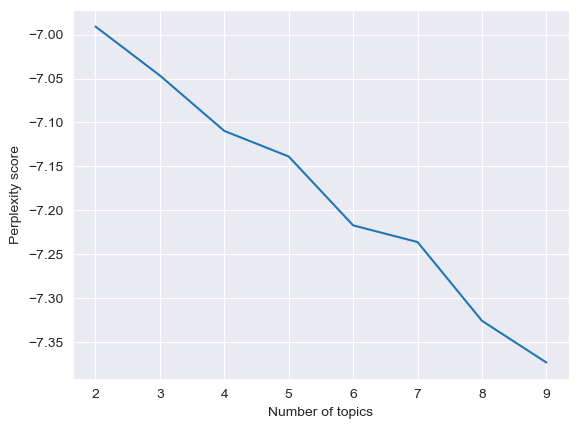

In [190]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [191]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:02<00:00,  7.85s/it]


Text(0, 0.5, 'Coherence score')

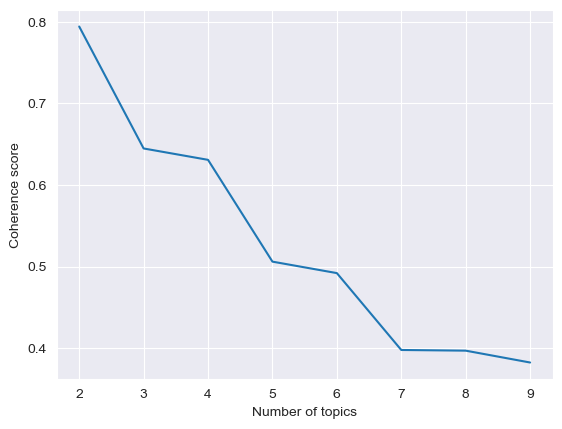

In [192]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [193]:
import numpy as np
from tqdm import tqdm

topic_num = 4
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster0.loc[:, 'action_cluster'] = action_align

df_cluster0


100%|██████████| 2979/2979 [00:00<00:00, 9143.88it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\2112464866.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.loc[:, 'action_cluster'] = action_align


,Title,tagged_review,vector,cluster,action_cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.020797942, 0.0034135766, -0.008000808, -0.0017764809, 0.006921907, -0.019937364, -0.0030684688, 0.026051998, -0.018387103, -0.008240109, 0.004564482, -0.00032808015, -0.016603619, 0.005557125, 0.006081177, -0.014421123, 0.007221052, 0.0029406878, -0.010873531, -0.019684158, -0.009755933, -0.0067098606, 0.00022245845, 0.00920576, 0.00010143168, -0.011920954, -0.011746777, -0.028573109, 0.01564139, -0.010340864, 0.02208229, 0.01439745, -0.012972576, -0.0017762056, 0.00010889495, 0.013490171, 0.0063074855, -0.02119862, -0.0012928008, -0.018283233, 0.0052620135, -0.01737321, 0.0066214837, -0.0034741426, 0.017083935, -0.0038907898, -0.00900771, -0.0064373976, 0.0062580896, 0.008289342, -0.0011181751, -0.0033853564, 0.0010352933, 0.008579101, -0.014570687, 0.01578289, 0.0013777512, 0.0028397054, -0.019802934, 0.012671545, 0.009831049, 0.006441448, 0.004752128, 0.0037612917, -0.021262445, -0.0050994502, 0.020149795, 0.011517451, -0.009353718, 0.0045316643, -0.011947125, -0.00020104623, -0.002588084, -0.0018521169, 0.0011964198, 0.0012759119, -0.007827144, -0.0056378874, -0.0063793175, 0.009480956, 0.015024908, 0.0067665144, -0.020040171, 0.0119045805, 0.006433324, 0.003734001, -0.006256812, 0.01288099, 0.016230645, 0.00022107002, 0.010398396, 0.012365399, -0.013266684, -0.00648175, 0.019930962, 0.02474692, 0.008890621, -0.018400703, 0.015084261, -0.0022740976]",0,1
2,월에 캐나다로 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,"[캐나다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[-0.006321024, -0.0054830573, 0.009516439, -0.0038656732, 0.008615421, -0.0053122793, 0.010525484, -0.0038206736, 0.00090264675, 0.008897436, -0.006069603, 0.0073460424, -0.00968153, 0.0004378954, 0.005291607, 0.011592717, -0.00017167133, -0.0024920274, -0.002112397, -0.0024349769, -0.00967723, -0.009350497, 0.0050365627, 0.0042772987, -0.0024991198, 0.0001292901, -7.061512e-05, 0.0011182337, -0.0024351007, 0.0044025425, -0.005076982, -0.0071801646, 0.01093019, -0.008280508, -0.006002528, 0.0037301371, -0.0080784615, -0.0065060793, 0.0045875437, -0.0064905286, 0.011305679, 0.008827802, 0.0074414625, 0.0054274653, -0.0058650994, -0.00084530545, -0.0036121588, 0.0008498888, -0.00865818, -0.00028602, -0.013977108, -0.0041518286, -0.004906416, -0.00078007276, 0.0041407323, 0.007996444, -0.00017895254, 0.009946854, -0.0037779144, -0.00080805266, 0.0029511263, 0.0050674668, 0.0013103182, 0.004190423, -0.004786029, 0.0047635976, 0.013391214, 0.007965463, 0.007608254, 0.0064008273, -0.014660693, 0.0021174578, -0.005644731, 0.0008632857, 0.006397442, -0.004503835, -0.0118257785, -0.0034510933, -0.0019288012, -0.0036893138, -0.004318493, 0.0054525877, -0.004479676, 0.0035795846, -0.0043303636, 0.008056617, -0.0062621655, -0.0035080442, -0.013479355, 0.0047272663, -0.0036082556, -0.012344747, -0.011939539, -0.00156461, 0.0072621848, 0.0035774992, -0.0018913005, 0.0028138068, 0.009762812, -0.005396052]",0,1
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 있게,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다]","[0.008666066, -0.0027603705, -0.002284049, 0.010125675, -0.005083066, 0.009531895, -0.008650777, -0.016966239, 0.012154335, 0.007845423, -0.0013207805, -0.0066974415, 0.019509504, 0.0025847396, -0.00034908077, 0.001084327, 0.0019856505, 0.013176665, 0.004347129, 0.020442521, 0.0016212997, 0.010928067, -0.010397978, 0.009207039, 0.002914623, 0.013044435, 0.009274704, 0.0029011387, 0.0019749003, -0.0045990343, -0.014205096, -0.007515734, 0.002976911, 0.0089957565, 0.00069502275, -0.0055868113, -0.016043039, 0.0023453194, 0.0007310363, 0.008627276, -0.007016943, 0.01306792, -0.005878334, -0.0011015538, -0.015972385, -0.004519671, -0.0026800558, 0.0051172245, -0.007869275, -0.0033511678, -0.008288841, 0.008852664, -0.0025194583, -0.006457456, 0.011504

In [194]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster0.html')

In [195]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.031*"할인" + 0.027*"가격" + 0.014*"없다" + 0.012*"사다" + 0.009*"판매" + 0.009*"적용" + 0.009*"해주다" + 0.008*"영상" + 0.008*"넣다" + 0.008*"궁금하다"
Topic ID: 1, Description: 0.097*"좋다" + 0.050*"기능" + 0.039*"사용" + 0.026*"디자인" + 0.013*"요리" + 0.013*"많다" + 0.011*"이쁘다" + 0.011*"구입" + 0.011*"깔끔하다" + 0.010*"만족하다"
Topic ID: 2, Description: 0.062*"기능" + 0.047*"사용" + 0.043*"좋다" + 0.030*"요리" + 0.017*"다양하다" + 0.016*"디자인" + 0.014*"많다" + 0.013*"편하다" + 0.011*"크다" + 0.010*"스팀"
Topic ID: 3, Description: 0.019*"설치" + 0.013*"주문" + 0.013*"주방" + 0.013*"육식" + 0.012*"요리" + 0.011*"해주다" + 0.011*"가격" + 0.010*"수비드" + 0.009*"직접" + 0.009*"오다"


In [196]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 2
    elif i == 2:
        n = 1
    else:
        n = 4
    new_action_topic.append(n)
df_cluster0.action_cluster = new_action_topic

100%|██████████| 2979/2979 [00:00<00:00, 2979215.93it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\288542425.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster0.action_cluster = new_action_topic


# 클러스터 0 결과

In [197]:
df_cluster0

,Title,tagged_review,vector,cluster,action_cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,"[예전, 가스, 사용, 해봤다, 이사오, 기광, 설치, 케이크, 구울, 간단하다, 몇개]","[-0.020797942, 0.0034135766, -0.008000808, -0.0017764809, 0.006921907, -0.019937364, -0.0030684688, 0.026051998, -0.018387103, -0.008240109, 0.004564482, -0.00032808015, -0.016603619, 0.005557125, 0.006081177, -0.014421123, 0.007221052, 0.0029406878, -0.010873531, -0.019684158, -0.009755933, -0.0067098606, 0.00022245845, 0.00920576, 0.00010143168, -0.011920954, -0.011746777, -0.028573109, 0.01564139, -0.010340864, 0.02208229, 0.01439745, -0.012972576, -0.0017762056, 0.00010889495, 0.013490171, 0.0063074855, -0.02119862, -0.0012928008, -0.018283233, 0.0052620135, -0.01737321, 0.0066214837, -0.0034741426, 0.017083935, -0.0038907898, -0.00900771, -0.0064373976, 0.0062580896, 0.008289342, -0.0011181751, -0.0033853564, 0.0010352933, 0.008579101, -0.014570687, 0.01578289, 0.0013777512, 0.0028397054, -0.019802934, 0.012671545, 0.009831049, 0.006441448, 0.004752128, 0.0037612917, -0.021262445, -0.0050994502, 0.020149795, 0.011517451, -0.009353718, 0.0045316643, -0.011947125, -0.00020104623, -0.002588084, -0.0018521169, 0.0011964198, 0.0012759119, -0.007827144, -0.0056378874, -0.0063793175, 0.009480956, 0.015024908, 0.0067665144, -0.020040171, 0.0119045805, 0.006433324, 0.003734001, -0.006256812, 0.01288099, 0.016230645, 0.00022107002, 0.010398396, 0.012365399, -0.013266684, -0.00648175, 0.019930962, 0.02474692, 0.008890621, -0.018400703, 0.015084261, -0.0022740976]",0,2
2,월에 캐나다로 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,"[캐나다, 예정, 기능, 많다, 좋다, 기다, 캐나다, 전압, 달라, 가져가다]","[-0.006321024, -0.0054830573, 0.009516439, -0.0038656732, 0.008615421, -0.0053122793, 0.010525484, -0.0038206736, 0.00090264675, 0.008897436, -0.006069603, 0.0073460424, -0.00968153, 0.0004378954, 0.005291607, 0.011592717, -0.00017167133, -0.0024920274, -0.002112397, -0.0024349769, -0.00967723, -0.009350497, 0.0050365627, 0.0042772987, -0.0024991198, 0.0001292901, -7.061512e-05, 0.0011182337, -0.0024351007, 0.0044025425, -0.005076982, -0.0071801646, 0.01093019, -0.008280508, -0.006002528, 0.0037301371, -0.0080784615, -0.0065060793, 0.0045875437, -0.0064905286, 0.011305679, 0.008827802, 0.0074414625, 0.0054274653, -0.0058650994, -0.00084530545, -0.0036121588, 0.0008498888, -0.00865818, -0.00028602, -0.013977108, -0.0041518286, -0.004906416, -0.00078007276, 0.0041407323, 0.007996444, -0.00017895254, 0.009946854, -0.0037779144, -0.00080805266, 0.0029511263, 0.0050674668, 0.0013103182, 0.004190423, -0.004786029, 0.0047635976, 0.013391214, 0.007965463, 0.007608254, 0.0064008273, -0.014660693, 0.0021174578, -0.005644731, 0.0008632857, 0.006397442, -0.004503835, -0.0118257785, -0.0034510933, -0.0019288012, -0.0036893138, -0.004318493, 0.0054525877, -0.004479676, 0.0035795846, -0.0043303636, 0.008056617, -0.0062621655, -0.0035080442, -0.013479355, 0.0047272663, -0.0036082556, -0.012344747, -0.011939539, -0.00156461, 0.0072621848, 0.0035774992, -0.0018913005, 0.0028138068, 0.009762812, -0.005396052]",0,2
3,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 있게,"[회전, 아파트, 옵션, 예전, 괜찮다, 이사, 오다]","[0.008666066, -0.0027603705, -0.002284049, 0.010125675, -0.005083066, 0.009531895, -0.008650777, -0.016966239, 0.012154335, 0.007845423, -0.0013207805, -0.0066974415, 0.019509504, 0.0025847396, -0.00034908077, 0.001084327, 0.0019856505, 0.013176665, 0.004347129, 0.020442521, 0.0016212997, 0.010928067, -0.010397978, 0.009207039, 0.002914623, 0.013044435, 0.009274704, 0.0029011387, 0.0019749003, -0.0045990343, -0.014205096, -0.007515734, 0.002976911, 0.0089957565, 0.00069502275, -0.0055868113, -0.016043039, 0.0023453194, 0.0007310363, 0.008627276, -0.007016943, 0.01306792, -0.005878334, -0.0011015538, -0.015972385, -0.004519671, -0.0026800558, 0.0051172245, -0.007869275, -0.0033511678, -0.008288841, 0.008852664, -0.0025194583, -0.006457456, 0.011504

# 클러스터 1

In [198]:
df_cluster1 = df[df["cluster"] == 1]
display(df_cluster1)
display(df_cluster1.shape)

,Title,tagged_review,vector,cluster
7,처음에 입주할때 부터 빌트인 되어있는 광파오븐 사용 중인데요 년이 넘어서 가끔 연기도 나고 불꽃도 튀고 이래서 겁이 나네요 신청은 해두었는데 혹시 가전,"[빌트, 사용, 넘어서다, 가끔, 연기, 불꽃, 튀다, 신청, 두다]","[-0.014727528, 0.03927067, -0.0023155892, -0.030493299, -0.0014785554, -0.04242467, 0.0267795, 0.06933345, -0.018474692, -0.030237446, 0.008331687, -0.020071108, -0.034857947, 0.0109030735, 0.012174999, -0.009640181, 0.0058871014, -0.020446707, -0.007870164, -0.04764781, -0.020264486, -0.019847466, 0.019186001, 0.0061100195, -0.0077916514, -0.010375689, 0.0011768108, -0.029844157, 0.029255057, -0.011024134, 0.056943417, 0.027916027, -0.017378278, 0.0103559885, -0.0031379173, 0.02414558, 0.017608862, -0.034369856, 0.009072425, -0.057413124, 0.026869329, -0.029563095, -0.0051816874, 0.0048828316, 0.026491405, -0.010517774, -0.023090007, -0.011520749, 0.00054466445, 0.04925464, 0.0060452046, -0.02461944, 0.0051586074, 0.03137748, -0.023946708, 0.010663126, -0.0024507518, -0.010500574, -0.03992173, 0.010128827, 0.010865012, -0.023746202, 0.0045216046, 0.023425747, -0.059394967, -0.008061979, 0.051973112, 0.02713351, -0.013985378, 0.038441274, -0.0215271, 0.0029525843, 0.009873218, 0.0067221713, 0.013309199, 0.020493042, 0.0075586736, -0.0007732278, -0.020706054, 0.01791599, 0.018101253, 0.0055994717, -0.0152558675, 0.02670414, 0.002939445, 0.00689179, -0.03026532, 0.050319854, 0.022497438, 0.002619845, 0.038387597, 0.027493484, -0.009112137, 0.00024568755, 0.06152761, 0.03303751, 0.022174783, -0.037342437, 0.0286554, -0.003799052]",1
38,저는 신혼가전을 웬만하면 맞추었어요 베스트샵에서 맞췄는데 광파오븐 신형은 너무 비싸다고 판단되어 묶어서 구매하지 않았답니다 광파오븐 구형을,"[신혼, 웬만하다, 맞추다, 맞추다, 신형, 비싸다, 판단, 묶다, 않다, 구형]","[-0.024563413, 0.034816008, 0.0032934851, -0.033955265, -0.0028743264, -0.052648436, 0.01628186, 0.08101164, -0.024757694, -0.037397925, -0.012983812, -0.028781129, -0.026244432, 0.012490257, 0.022597615, -0.004978745, 0.0010042161, -0.035699137, 0.0007401528, -0.038889065, -0.029833786, -0.004493928, 0.00980367, 0.010273584, -0.017659878, 0.0048057428, 0.023192216, -0.037779972, 0.014146971, 0.010891688, 0.052009948, 0.019448388, -0.009098252, -0.0006103969, -0.020046547, 0.021373263, 0.034047928, -0.029058812, -0.0042799544, -0.054001234, 0.029584026, -0.022661764, -0.02403108, -0.00013594527, 0.039079525, -0.016120797, -0.021848686, -0.008710286, -0.00033136545, 0.02633529, 0.009747625, -0.04116906, 0.012316012, 0.01688498, -0.041308377, 0.02029012, 0.009258282, -0.014043893, -0.037792366, 0.0046298048, 0.014120035, -0.007583004, -0.0069302293, 0.015006966, -0.04968714, -0.0065087657, 0.054856613, 0.018281393, -0.03071126, 0.04131019, -0.0068656425, 0.0032664696, 0.007232446, 0.009022319, 0.02245988, 0.0139148645, 0.006575607, -0.019620657, -0.007823974, 0.016062496, 0.013284982, 0.00032349044, -0.0104553485, 0.027747044, -0.012404967, -0.00059181, -0.03287783, 0.051668834, 0.026385188, 0.008712824, 0.06222816, 0.033872392, -0.0025689483, 0.025643319, 0.05896359, 0.0313742, 0.011235686, -0.04950211, 0.032648962, -0.004352595]",1
61,엘지광파오븐레인지 핫딜중이네요 엘지광파오븐레인지 찾아보고 계시죠 아마 글을 클릭하신 분들은 보고 주문해야 되지 또는 어떤 기능이 있는 거야라는,"[찾아보다, 계시, 아마, 클릭, 보고, 주문, 기능]","[-0.022486165, 0.021452375, -0.0051878514, -0.022602987, 0.0104963165, -0.029092925, 0.019645216, 0.0485982, -0.019414632, -0.016263802, -0.0030501075, -0.021051865, -0.013869093, 0.01572844, 0.024797633, -0.007499678, 0.015452205, -0.024862058, -0.010970439, -0.034846522, -0.022477722, -0.005736893, 0.013764419, 0.013568374, -2.1942018e-05, -0.008145215, -0.0030884938, -0.018531494, 0.023059078, -0.004570093, 0.029508177, 0.008180324, -0.015033584, 0.005792874, -0.0070432634, 0.020780867, 0.0215662, -0.020867543, 0.0036714016, -0.033338334, 0.022645043, -0.022411196, -0.0047450177, 0.005574373, 0.025193464, 0.0035585212, -0.017730948, 0.0027694288, 0.010238291, 0.033904836, 0.009412659, -0.004669846, 0.006516838, 0.023996942, -0.026474457, 0.009163267, 0.014722665, 0.0074815582, -0.018666739, 0.00032242702, 0.0016880665, -0.008546582, -0.00744259, 0.010077833, -0.04239

(1152, 4)

In [199]:
all_docs = list(df_cluster1["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

3896

In [200]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

1152

In [201]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

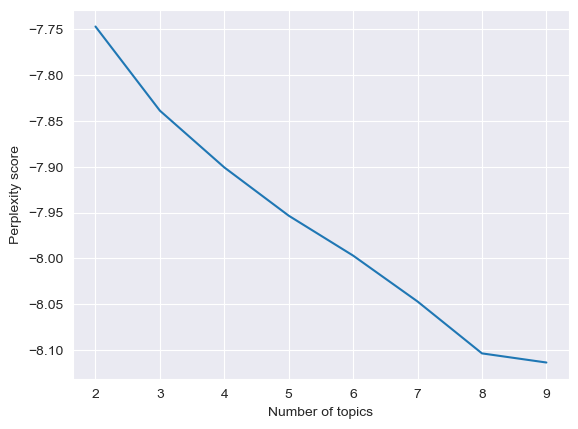

In [202]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [203]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:02<00:00,  7.79s/it]


Text(0, 0.5, 'Coherence score')

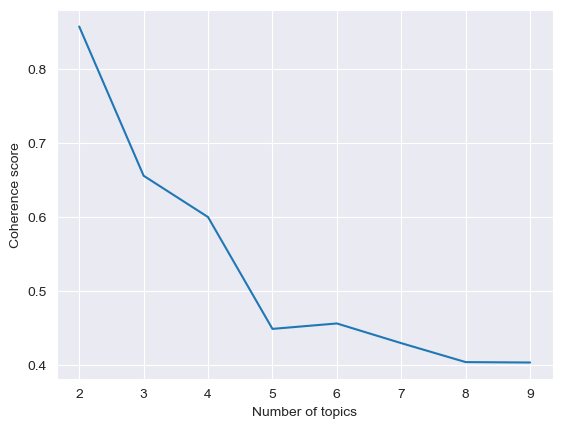

In [204]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [205]:
topic_num = 3
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster1.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster1.html')

100%|██████████| 1152/1152 [00:00<00:00, 8006.47it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\3578888884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.loc[:, 'action_cluster'] = action_align


In [206]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.012*"좋다" + 0.010*"거래" + 0.007*"기능" + 0.007*"사용" + 0.007*"주방" + 0.007*"빌트" + 0.006*"요리" + 0.006*"판매" + 0.005*"가격" + 0.005*"할인"
Topic ID: 1, Description: 0.013*"좋다" + 0.010*"사용" + 0.009*"혼수" + 0.009*"견적" + 0.008*"이르다" + 0.008*"할인" + 0.007*"품목" + 0.007*"구입" + 0.006*"가격" + 0.006*"백화점"
Topic ID: 2, Description: 0.017*"기능" + 0.012*"설치" + 0.010*"인기" + 0.008*"가격" + 0.007*"좋다" + 0.007*"사용" + 0.007*"요리" + 0.006*"많다" + 0.006*"스팀" + 0.006*"구입"


In [207]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster1.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 1
    else:
        n = 2
    new_action_topic.append(n)
df_cluster1.action_cluster = new_action_topic

100%|██████████| 1152/1152 [00:00<?, ?it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\2841501370.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1.action_cluster = new_action_topic


# 클러스터 1 결과

In [208]:
df_cluster1

,Title,tagged_review,vector,cluster,action_cluster
7,처음에 입주할때 부터 빌트인 되어있는 광파오븐 사용 중인데요 년이 넘어서 가끔 연기도 나고 불꽃도 튀고 이래서 겁이 나네요 신청은 해두었는데 혹시 가전,"[빌트, 사용, 넘어서다, 가끔, 연기, 불꽃, 튀다, 신청, 두다]","[-0.014727528, 0.03927067, -0.0023155892, -0.030493299, -0.0014785554, -0.04242467, 0.0267795, 0.06933345, -0.018474692, -0.030237446, 0.008331687, -0.020071108, -0.034857947, 0.0109030735, 0.012174999, -0.009640181, 0.0058871014, -0.020446707, -0.007870164, -0.04764781, -0.020264486, -0.019847466, 0.019186001, 0.0061100195, -0.0077916514, -0.010375689, 0.0011768108, -0.029844157, 0.029255057, -0.011024134, 0.056943417, 0.027916027, -0.017378278, 0.0103559885, -0.0031379173, 0.02414558, 0.017608862, -0.034369856, 0.009072425, -0.057413124, 0.026869329, -0.029563095, -0.0051816874, 0.0048828316, 0.026491405, -0.010517774, -0.023090007, -0.011520749, 0.00054466445, 0.04925464, 0.0060452046, -0.02461944, 0.0051586074, 0.03137748, -0.023946708, 0.010663126, -0.0024507518, -0.010500574, -0.03992173, 0.010128827, 0.010865012, -0.023746202, 0.0045216046, 0.023425747, -0.059394967, -0.008061979, 0.051973112, 0.02713351, -0.013985378, 0.038441274, -0.0215271, 0.0029525843, 0.009873218, 0.0067221713, 0.013309199, 0.020493042, 0.0075586736, -0.0007732278, -0.020706054, 0.01791599, 0.018101253, 0.0055994717, -0.0152558675, 0.02670414, 0.002939445, 0.00689179, -0.03026532, 0.050319854, 0.022497438, 0.002619845, 0.038387597, 0.027493484, -0.009112137, 0.00024568755, 0.06152761, 0.03303751, 0.022174783, -0.037342437, 0.0286554, -0.003799052]",1,3
38,저는 신혼가전을 웬만하면 맞추었어요 베스트샵에서 맞췄는데 광파오븐 신형은 너무 비싸다고 판단되어 묶어서 구매하지 않았답니다 광파오븐 구형을,"[신혼, 웬만하다, 맞추다, 맞추다, 신형, 비싸다, 판단, 묶다, 않다, 구형]","[-0.024563413, 0.034816008, 0.0032934851, -0.033955265, -0.0028743264, -0.052648436, 0.01628186, 0.08101164, -0.024757694, -0.037397925, -0.012983812, -0.028781129, -0.026244432, 0.012490257, 0.022597615, -0.004978745, 0.0010042161, -0.035699137, 0.0007401528, -0.038889065, -0.029833786, -0.004493928, 0.00980367, 0.010273584, -0.017659878, 0.0048057428, 0.023192216, -0.037779972, 0.014146971, 0.010891688, 0.052009948, 0.019448388, -0.009098252, -0.0006103969, -0.020046547, 0.021373263, 0.034047928, -0.029058812, -0.0042799544, -0.054001234, 0.029584026, -0.022661764, -0.02403108, -0.00013594527, 0.039079525, -0.016120797, -0.021848686, -0.008710286, -0.00033136545, 0.02633529, 0.009747625, -0.04116906, 0.012316012, 0.01688498, -0.041308377, 0.02029012, 0.009258282, -0.014043893, -0.037792366, 0.0046298048, 0.014120035, -0.007583004, -0.0069302293, 0.015006966, -0.04968714, -0.0065087657, 0.054856613, 0.018281393, -0.03071126, 0.04131019, -0.0068656425, 0.0032664696, 0.007232446, 0.009022319, 0.02245988, 0.0139148645, 0.006575607, -0.019620657, -0.007823974, 0.016062496, 0.013284982, 0.00032349044, -0.0104553485, 0.027747044, -0.012404967, -0.00059181, -0.03287783, 0.051668834, 0.026385188, 0.008712824, 0.06222816, 0.033872392, -0.0025689483, 0.025643319, 0.05896359, 0.0313742, 0.011235686, -0.04950211, 0.032648962, -0.004352595]",1,3
61,엘지광파오븐레인지 핫딜중이네요 엘지광파오븐레인지 찾아보고 계시죠 아마 글을 클릭하신 분들은 보고 주문해야 되지 또는 어떤 기능이 있는 거야라는,"[찾아보다, 계시, 아마, 클릭, 보고, 주문, 기능]","[-0.022486165, 0.021452375, -0.0051878514, -0.022602987, 0.0104963165, -0.029092925, 0.019645216, 0.0485982, -0.019414632, -0.016263802, -0.0030501075, -0.021051865, -0.013869093, 0.01572844, 0.024797633, -0.007499678, 0.015452205, -0.024862058, -0.010970439, -0.034846522, -0.022477722, -0.005736893, 0.013764419, 0.013568374, -2.1942018e-05, -0.008145215, -0.0030884938, -0.018531494, 0.023059078, -0.004570093, 0.029508177, 0.008180324, -0.015033584, 0.005792874, -0.0070432634, 0.020780867, 0.0215662, -0.020867543, 0.0036714016, -0.033338334, 0.022645043, -0.022411196, -0.0047450177, 0.005574373, 0.025193464, 0.0035585212, -0.017730948, 0.0027694288, 0.010238291, 0.033904836, 0.009412659, -0.004669846, 0.006516838, 0.023996942, -0.026474457, 0.009163267, 0.014722665, 0.0074815582, -0.018666739, 0.00032242702, 0.0016880665, -0.008546582, -0.00744259, 0.

# 클러스터 2

In [209]:
df_cluster2 = df[df["cluster"] == 2]
display(df_cluster2)
display(df_cluster2.shape)

,Title,tagged_review,vector,cluster
99,배달책자쿠폰교환 이용부탁드립니다 드림받는 횟수는 회까지 어길시 일정지 채팅거래 거래시 드림하신분 받으신분 모두정지처리 전자렌지로 겸용,"[배달, 책자, 쿠폰, 교환, 이용, 부탁드리다, 드림, 횟수, 어기다, 일정, 채팅, 거래, 거래, 드림, 신분, 신분, 정지, 처리, 겸용]","[-0.06800681, 0.0531529, 0.02000623, -0.0465309, 0.019910628, -0.08789507, 0.03623443, 0.14691415, -0.027583033, -0.056901325, 0.0036974945, -0.03278725, -0.06986301, 0.024746861, 0.032104325, -0.03125919, 0.023478622, -0.06789743, -0.006049022, -0.06843194, -0.032928713, -0.039884318, 0.038025413, 0.04547602, -0.015811948, -0.022679873, -0.0031642052, -0.070098855, 0.050421823, 0.003394038, 0.10250977, 0.051415283, -0.029062664, -0.013003076, -0.013109049, 0.050854202, 0.05508155, -0.052238617, 0.013694077, -0.073953666, 0.037784923, -0.04522088, -0.016626433, 0.008092896, 0.05511092, -0.029925618, -0.0500399, -0.014242236, 0.015637241, 0.07755341, 0.001198648, -0.04378531, 0.027870934, 0.065093, -0.06742754, 0.039518837, 0.04362537, -0.020609396, -0.060075883, 0.0023990362, 0.024877828, -0.02968134, -0.0010999622, 0.00947295, -0.10091618, -0.02003764, 0.07090404, 0.03141953, -0.06638807, 0.041489936, -0.011105575, 0.015572974, 0.035619162, 0.042403236, 0.029895818, 0.022200918, -0.012992214, -0.009256983, -0.049664315, 0.03746495, 0.031803798, 0.0025706692, -0.04403269, 0.059653234, -0.018836582, 0.029023848, -0.06759026, 0.08382907, 0.046576157, 0.011748362, 0.08360425, 0.05041244, -0.013792407, 0.016477559, 0.12563291, 0.08288058, 0.028120259, -0.060735896, 0.02754174, -0.023058636]",2
189,빌트인 광파오븐을 쓰는데요 틀로 마들렌 구울 오븐기능으로 정도 합니다 근데 가운데 개는 테두리만 타고 살짝 구움색 나고 양옆 개는,"[빌트, 마들렌, 구울, 기능, 가운데, 개다, 테두리, 타고, 살짝, 움색, 양옆, 개다]","[-0.047938425, 0.060164053, 0.0083552, -0.054801714, 0.0022243485, -0.07520916, 0.03887292, 0.13395765, -0.024264658, -0.047212496, 0.010086682, -0.037716083, -0.065363765, 0.02710809, 0.032299805, -0.030431338, 0.015821006, -0.05000208, -0.00326891, -0.07700403, -0.04195127, -0.023789147, 0.02913972, 0.036490534, -0.028848933, -0.02486305, 0.0010183079, -0.064415775, 0.049298905, -0.011251215, 0.08063304, 0.046008345, -0.029937914, -0.008994876, -0.022220671, 0.03623316, 0.044085547, -0.056560963, 0.01919364, -0.07918067, 0.03289978, -0.035826705, -0.0012701117, 0.024522513, 0.03882371, -0.016673245, -0.03842804, -0.013599127, 0.0140947085, 0.06196479, -0.001630164, -0.036143653, 0.02241924, 0.051330514, -0.044746514, 0.024860902, 0.012544, -0.01655059, -0.07302827, 0.018785113, 0.019509489, -0.0340219, 0.0041701556, 0.024467688, -0.10238055, -0.020114653, 0.07787422, 0.025433138, -0.033895638, 0.04190503, -0.019224744, -0.010468272, 0.024015903, 0.038423616, 0.030014254, 0.012404266, -0.008599777, 0.00022381044, -0.021418758, 0.03532776, 0.034919195, 0.009305034, -0.049145937, 0.048102204, -0.011645883, 0.00070669904, -0.06601821, 0.07569401, 0.03394325, 0.0057784244, 0.08628981, 0.030811183, -0.012100786, 0.0041877185, 0.08534161, 0.06277101, 0.031296823, -0.06451987, 0.039183076, -0.016404271]",2
230,오랜만에 엄니집 갔는데 광파오븐을 꺼내두셨더라구요 안쓴지 년은 넘은거 같은데 되나 싶어서 급하게 마트가서 한마리 사서 대애충 간장양념 슥슥 잘라서,"[엄니, 가다, 꺼내다, 두다, 쓴다, 넘다, 급하다, 마트, 가다, 마리, 사서, 대애, 간장, 양념, 자르다]","[-0.029937882, 0.047452025, 0.014941145, -0.047397897, -0.0030213415, -0.06470481, 0.025323689, 0.11126255, -0.018533511, -0.025447786, -0.0006881613, -0.037084874, -0.03322805, 0.017316991, 0.03300364, -0.021510025, 0.013895844, -0.032698855, -0.011341746, -0.06892101, -0.012278882, -0.022650884, 0.018506853, 0.03510637, -0.020127375, -0.002371673, 0.0115668615, -0.0555087, 0.026713569, -0.004716118, 0.07382761, 0.041838475, -0.016155746, 0.0059897485, -0.008514475, 0.03703145, 0.020949535, -0.039054383, 0.013853125, -0.07768796, 0.03654897, -0.037795123, -0.0201646, 0.014553117, 0.03263676, -0.011303496, -0.036656868, -0.00591705, 0.0043763225, 0.058527563, 0.00059327786, -0.026327167, 0.022324525, 0.020865556, -0.046455655, 0.012543491, 0.010546041, -0.0003200436, -0.061807986, 0.0028203106, 0.00756508, -0.019863969, 0.0011950234, 0.020392949, -0.0848928, -0.0059572714

(557, 4)

In [210]:
all_docs = list(df_cluster2["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

3791

In [211]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

557

In [212]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

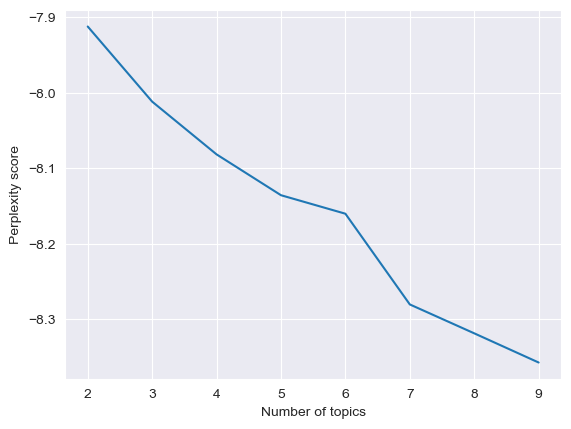

In [213]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [214]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:00<00:00,  7.50s/it]


Text(0, 0.5, 'Coherence score')

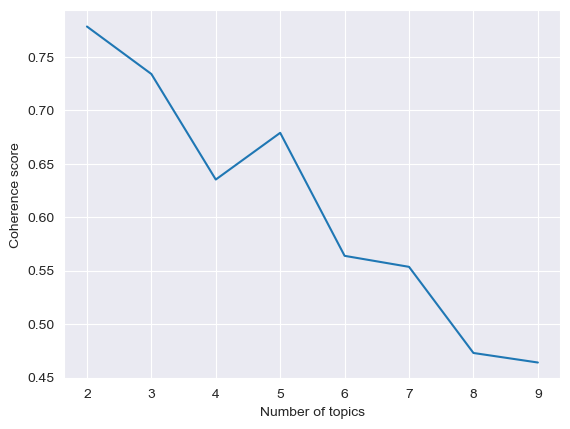

In [215]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [216]:
topic_num = 6
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster2.loc[:, 'action_cluster'] = action_align

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster2.html')

100%|██████████| 557/557 [00:00<00:00, 8998.02it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\2464020928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.loc[:, 'action_cluster'] = action_align


In [217]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.009*"견적" + 0.008*"할인" + 0.006*"매장" + 0.006*"사용" + 0.005*"오픈" + 0.005*"홈페이지" + 0.004*"숟가락" + 0.004*"모니터" + 0.004*"품목" + 0.004*"전기"
Topic ID: 1, Description: 0.015*"기능" + 0.014*"요리" + 0.014*"좋다" + 0.012*"없다" + 0.009*"사용" + 0.006*"해주다" + 0.006*"보고" + 0.006*"주방" + 0.005*"디자인" + 0.005*"많다"
Topic ID: 2, Description: 0.015*"이벤트" + 0.007*"사용" + 0.007*"퀴즈" + 0.006*"기능" + 0.005*"홈페이지" + 0.005*"좋다" + 0.005*"참여" + 0.005*"게시" + 0.004*"생각" + 0.004*"요리"
Topic ID: 3, Description: 0.013*"좋다" + 0.008*"전기" + 0.007*"가격" + 0.006*"주방" + 0.006*"포스팅" + 0.006*"인기" + 0.005*"지원" + 0.005*"원고료" + 0.005*"소정" + 0.005*"할인"
Topic ID: 4, Description: 0.019*"사용" + 0.018*"좋다" + 0.016*"기능" + 0.009*"없다" + 0.009*"않다" + 0.008*"요리" + 0.006*"넣다" + 0.005*"크다" + 0.005*"청소" + 0.005*"굽다"
Topic ID: 5, Description: 0.013*"좋다" + 0.009*"상담" + 0.009*"백화점" + 0.009*"기능" + 0.005*"출시" + 0.005*"세트" + 0.005*"혜택" + 0.005*"웨딩" + 0.004*"구입" + 0.004*"많다"


In [218]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster2.action_cluster):
    if i == 0:
        n = 5
    elif i == 1:
        n = 1
    elif i == 2:
        n = 3
    elif i == 3:
        n = 4
    elif i == 4:
        n = 2
    else:
        n = 6
    new_action_topic.append(n)
df_cluster2.action_cluster = new_action_topic

100%|██████████| 557/557 [00:00<00:00, 557173.22it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\463193041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster2.action_cluster = new_action_topic


In [219]:
df_cluster2

,Title,tagged_review,vector,cluster,action_cluster
99,배달책자쿠폰교환 이용부탁드립니다 드림받는 횟수는 회까지 어길시 일정지 채팅거래 거래시 드림하신분 받으신분 모두정지처리 전자렌지로 겸용,"[배달, 책자, 쿠폰, 교환, 이용, 부탁드리다, 드림, 횟수, 어기다, 일정, 채팅, 거래, 거래, 드림, 신분, 신분, 정지, 처리, 겸용]","[-0.06800681, 0.0531529, 0.02000623, -0.0465309, 0.019910628, -0.08789507, 0.03623443, 0.14691415, -0.027583033, -0.056901325, 0.0036974945, -0.03278725, -0.06986301, 0.024746861, 0.032104325, -0.03125919, 0.023478622, -0.06789743, -0.006049022, -0.06843194, -0.032928713, -0.039884318, 0.038025413, 0.04547602, -0.015811948, -0.022679873, -0.0031642052, -0.070098855, 0.050421823, 0.003394038, 0.10250977, 0.051415283, -0.029062664, -0.013003076, -0.013109049, 0.050854202, 0.05508155, -0.052238617, 0.013694077, -0.073953666, 0.037784923, -0.04522088, -0.016626433, 0.008092896, 0.05511092, -0.029925618, -0.0500399, -0.014242236, 0.015637241, 0.07755341, 0.001198648, -0.04378531, 0.027870934, 0.065093, -0.06742754, 0.039518837, 0.04362537, -0.020609396, -0.060075883, 0.0023990362, 0.024877828, -0.02968134, -0.0010999622, 0.00947295, -0.10091618, -0.02003764, 0.07090404, 0.03141953, -0.06638807, 0.041489936, -0.011105575, 0.015572974, 0.035619162, 0.042403236, 0.029895818, 0.022200918, -0.012992214, -0.009256983, -0.049664315, 0.03746495, 0.031803798, 0.0025706692, -0.04403269, 0.059653234, -0.018836582, 0.029023848, -0.06759026, 0.08382907, 0.046576157, 0.011748362, 0.08360425, 0.05041244, -0.013792407, 0.016477559, 0.12563291, 0.08288058, 0.028120259, -0.060735896, 0.02754174, -0.023058636]",2,6
189,빌트인 광파오븐을 쓰는데요 틀로 마들렌 구울 오븐기능으로 정도 합니다 근데 가운데 개는 테두리만 타고 살짝 구움색 나고 양옆 개는,"[빌트, 마들렌, 구울, 기능, 가운데, 개다, 테두리, 타고, 살짝, 움색, 양옆, 개다]","[-0.047938425, 0.060164053, 0.0083552, -0.054801714, 0.0022243485, -0.07520916, 0.03887292, 0.13395765, -0.024264658, -0.047212496, 0.010086682, -0.037716083, -0.065363765, 0.02710809, 0.032299805, -0.030431338, 0.015821006, -0.05000208, -0.00326891, -0.07700403, -0.04195127, -0.023789147, 0.02913972, 0.036490534, -0.028848933, -0.02486305, 0.0010183079, -0.064415775, 0.049298905, -0.011251215, 0.08063304, 0.046008345, -0.029937914, -0.008994876, -0.022220671, 0.03623316, 0.044085547, -0.056560963, 0.01919364, -0.07918067, 0.03289978, -0.035826705, -0.0012701117, 0.024522513, 0.03882371, -0.016673245, -0.03842804, -0.013599127, 0.0140947085, 0.06196479, -0.001630164, -0.036143653, 0.02241924, 0.051330514, -0.044746514, 0.024860902, 0.012544, -0.01655059, -0.07302827, 0.018785113, 0.019509489, -0.0340219, 0.0041701556, 0.024467688, -0.10238055, -0.020114653, 0.07787422, 0.025433138, -0.033895638, 0.04190503, -0.019224744, -0.010468272, 0.024015903, 0.038423616, 0.030014254, 0.012404266, -0.008599777, 0.00022381044, -0.021418758, 0.03532776, 0.034919195, 0.009305034, -0.049145937, 0.048102204, -0.011645883, 0.00070669904, -0.06601821, 0.07569401, 0.03394325, 0.0057784244, 0.08628981, 0.030811183, -0.012100786, 0.0041877185, 0.08534161, 0.06277101, 0.031296823, -0.06451987, 0.039183076, -0.016404271]",2,6
230,오랜만에 엄니집 갔는데 광파오븐을 꺼내두셨더라구요 안쓴지 년은 넘은거 같은데 되나 싶어서 급하게 마트가서 한마리 사서 대애충 간장양념 슥슥 잘라서,"[엄니, 가다, 꺼내다, 두다, 쓴다, 넘다, 급하다, 마트, 가다, 마리, 사서, 대애, 간장, 양념, 자르다]","[-0.029937882, 0.047452025, 0.014941145, -0.047397897, -0.0030213415, -0.06470481, 0.025323689, 0.11126255, -0.018533511, -0.025447786, -0.0006881613, -0.037084874, -0.03322805, 0.017316991, 0.03300364, -0.021510025, 0.013895844, -0.032698855, -0.011341746, -0.06892101, -0.012278882, -0.022650884, 0.018506853, 0.03510637, -0.020127375, -0.002371673, 0.0115668615, -0.0555087, 0.026713569, -0.004716118, 0.07382761, 0.041838475, -0.016155746, 0.0059897485, -0.008514475, 0.03703145, 0.020949535, -0.039054383, 0.013853125, -0.07768796, 0.03654897, -0.037795123, -0.0201646, 0.014553117, 0.03263676, -0.011303496, -0.036656868, -0.00591705, 0.0043763225, 0.058527563, 0.00059327786, -0.026327167, 0.022324525, 0.020865556, -0.046455655, 0.012543491, 0.010546041, -0.0003200436, -0.061807986, 0.0028203106, 0.00756508, -0.019863969, 0.0011950234, 0.020392949, -0.084

# 클러스터 3

In [220]:
df_cluster3 = df[df["cluster"] == 3]
display(df_cluster3)
display(df_cluster3.shape)

,Title,tagged_review,vector,cluster
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 그렇게 추천하는지 찾아봤는데,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.013392268, -0.02819333, -0.010192532, 0.014512931, -0.01728332, 0.027610036, -0.011112106, -0.048134793, 0.019337593, 0.030879376, 0.0072705504, 0.018148202, 0.010384349, -0.017995017, 0.008533982, -0.005665121, -0.010473175, 0.020866161, 0.0029100643, 0.04070185, 0.020270707, 0.009133993, -0.019630156, 0.003783007, 0.00048624177, -0.0007912135, -0.011552719, 0.0102349045, 0.011208989, -0.007935923, -0.033133548, -0.015507953, 0.0016538632, 0.014426522, 0.009520517, -0.008894237, -0.009689385, 0.019384384, -0.00586236, 0.032092113, -0.001609888, 0.020738801, 0.01715477, -0.014402908, -0.023670983, 0.017486481, 0.006465783, 0.012669555, -0.0049644904, -0.019048868, -0.011156149, 0.036094014, 0.01556418, -0.018754456, 0.023818545, -0.003971954, -0.0067490363, 0.024913857, 0.010594318, -0.015703011, -0.0019797187, 0.010821368, 0.0044593653, -0.0074693025, 0.04211472, -0.0027235197, -0.029272327, -0.024937505, 0.013031218, -0.034248818, -0.00018936046, -0.0043165386, -0.021438552, 0.003611186, -0.009725833, -0.013332374, 0.0019973763, 0.007782719, 0.012141516, -0.014347541, 0.0023412048, 0.00805985, -0.0024971105, -0.012124104, -0.015835583, 0.0151981395, 0.015701137, -0.033511803, -0.015447392, -0.0024489595, -0.037171252, -0.020151187, -0.0076924283, -0.004875147, -0.045552585, -0.01632081, -0.007828056, 0.017827015, -0.014175644, 0.0029261024]",3
12,안녕하세요 저희 예비부부가 정말 사용하고있는 저희집 오븐 전자의 디오스광파오븐을소개해드립니다 요즘 가전제품을 정말 활용도가 높고 심플하고 이쁜 디자인으로,"[예비, 부부, 사용, 소개, 해드리다, 요즘, 용도, 높다, 심플, 이쁘다, 디자인]","[0.034775164, -0.023329461, -0.008228824, 0.027978625, -0.008394222, 0.046898983, -0.019716417, -0.074869946, 0.02336864, 0.021238457, 0.0017303353, 0.016044693, 0.029387258, -0.01226904, -0.00976679, 0.03372158, -0.0076864227, 0.023913855, -0.0030070161, 0.029689677, 0.012837059, 0.016316539, -0.013345873, -0.022142302, 0.015723953, 0.011973111, -0.00498907, 0.05458059, -0.037703987, 0.011194397, -0.050082773, -0.020351162, 0.020572098, 0.0007673766, -0.0030459503, -0.022254022, -0.01622053, 0.028132608, 0.004525383, 0.04405485, -0.024028363, 0.016637068, 0.00010499614, -0.0013031838, -0.030099783, -0.0018366075, 0.029255942, 0.010343332, -0.0026942198, -0.034839444, -0.017691419, 0.02660798, -0.012021121, -0.026476411, 0.029979328, -0.017992586, -0.019266646, 0.0006014628, 0.032271884, -0.011834495, -0.006945975, 0.018355485, 0.0038451876, 0.0013787643, 0.056534685, 0.009470396, -0.037694044, -0.020998498, 0.029882565, -0.016580623, 0.001773961, 0.0072955983, -0.008735779, -0.030692078, -0.0031461194, -0.013831566, 0.0143261915, 0.00725481, 0.018031597, -0.012773987, -0.006893957, -0.0017147437, 0.019511651, -0.0360453, 0.0024959142, -0.0023273495, 0.026630547, -0.04637237, -0.024201244, -0.0070926803, -0.047852807, -0.035300363, 0.017750153, -0.005031874, -0.058107678, -0.045835227, -0.012414189, 0.046341635, -0.0134936925, 0.00916876]",3
14,안녕하세요 한경희광파오븐 찾는 분들이 관심을 갖고 글을 클릭하게 되셨을텐데요 제가 한경희광파오븐에 대해 찾아본 것들을 정리하여 알려드리도록 하겠습니다 먼저,"[한경희, 찾다, 관심, 갖다, 클릭, 한경희, 대해, 찾아보다, 정리, 알다, 드리다, 먼저]","[0.05301266, -0.05090774, -0.008799698, 0.027529823, -0.022930281, 0.07924233, -0.022199368, -0.13086176, 0.035664193, 0.062377457, 0.020045612, 0.044569865, 0.03273263, -0.036710687, -0.005255404, 0.0056546517, -0.0031672344, 0.039073016, -0.014207952, 0.07713672, 0.0008754942, 0.011751371, -0.040815346, -0.002957654, 0.018333381, 0.0029372587, 0.017447252, 0.034932543, 0.0026000617, -0.004447845, -0.085056394, -0.026916867, 0.007081518, 0.01111325, 0.025662687, -0.028941123, -0.021551551, 0.046990287, 0.019863538, 0.10583096, -0.0032332076, 0.040905602, 0.023288772, -0.019769419, -0.05595352, 0.043490354, 0.009887846, 0.010378756, -0.026952317, -0.026815087, -0.031091578, 0.06914869, 0.012503505, -0.038288593, 0.06895039, -0.017419888, -0.02739077, 0.025115617, 0.04335679, -0.04489627, -0.019578414, 0.004877857, -0.0

(523, 4)

In [221]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster3["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

1780

In [222]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

523

In [223]:
from gensim.models import CoherenceModel

In [224]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

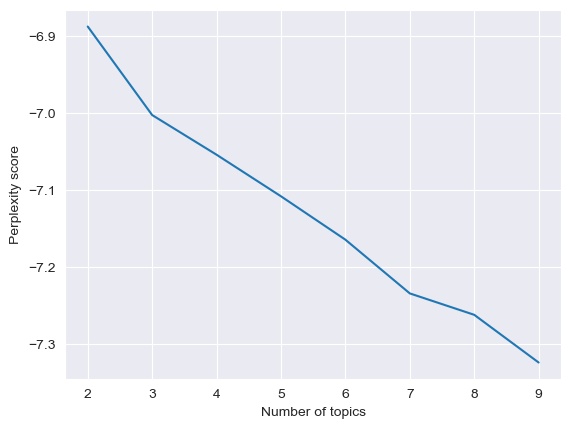

In [225]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [226]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [00:25<00:00,  3.15s/it]


Text(0, 0.5, 'Coherence score')

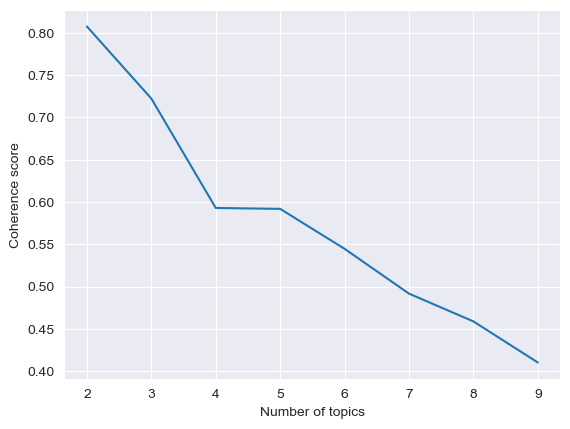

In [227]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [228]:
import numpy as np
from tqdm import tqdm

topic_num = 3
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster3.loc[:, 'action_cluster'] = action_align

df_cluster3


100%|██████████| 523/523 [00:00<00:00, 6885.90it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\3420839580.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster3.loc[:, 'action_cluster'] = action_align


,Title,tagged_review,vector,cluster,action_cluster
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 그렇게 추천하는지 찾아봤는데,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.013392268, -0.02819333, -0.010192532, 0.014512931, -0.01728332, 0.027610036, -0.011112106, -0.048134793, 0.019337593, 0.030879376, 0.0072705504, 0.018148202, 0.010384349, -0.017995017, 0.008533982, -0.005665121, -0.010473175, 0.020866161, 0.0029100643, 0.04070185, 0.020270707, 0.009133993, -0.019630156, 0.003783007, 0.00048624177, -0.0007912135, -0.011552719, 0.0102349045, 0.011208989, -0.007935923, -0.033133548, -0.015507953, 0.0016538632, 0.014426522, 0.009520517, -0.008894237, -0.009689385, 0.019384384, -0.00586236, 0.032092113, -0.001609888, 0.020738801, 0.01715477, -0.014402908, -0.023670983, 0.017486481, 0.006465783, 0.012669555, -0.0049644904, -0.019048868, -0.011156149, 0.036094014, 0.01556418, -0.018754456, 0.023818545, -0.003971954, -0.0067490363, 0.024913857, 0.010594318, -0.015703011, -0.0019797187, 0.010821368, 0.0044593653, -0.0074693025, 0.04211472, -0.0027235197, -0.029272327, -0.024937505, 0.013031218, -0.034248818, -0.00018936046, -0.0043165386, -0.021438552, 0.003611186, -0.009725833, -0.013332374, 0.0019973763, 0.007782719, 0.012141516, -0.014347541, 0.0023412048, 0.00805985, -0.0024971105, -0.012124104, -0.015835583, 0.0151981395, 0.015701137, -0.033511803, -0.015447392, -0.0024489595, -0.037171252, -0.020151187, -0.0076924283, -0.004875147, -0.045552585, -0.01632081, -0.007828056, 0.017827015, -0.014175644, 0.0029261024]",3,2
12,안녕하세요 저희 예비부부가 정말 사용하고있는 저희집 오븐 전자의 디오스광파오븐을소개해드립니다 요즘 가전제품을 정말 활용도가 높고 심플하고 이쁜 디자인으로,"[예비, 부부, 사용, 소개, 해드리다, 요즘, 용도, 높다, 심플, 이쁘다, 디자인]","[0.034775164, -0.023329461, -0.008228824, 0.027978625, -0.008394222, 0.046898983, -0.019716417, -0.074869946, 0.02336864, 0.021238457, 0.0017303353, 0.016044693, 0.029387258, -0.01226904, -0.00976679, 0.03372158, -0.0076864227, 0.023913855, -0.0030070161, 0.029689677, 0.012837059, 0.016316539, -0.013345873, -0.022142302, 0.015723953, 0.011973111, -0.00498907, 0.05458059, -0.037703987, 0.011194397, -0.050082773, -0.020351162, 0.020572098, 0.0007673766, -0.0030459503, -0.022254022, -0.01622053, 0.028132608, 0.004525383, 0.04405485, -0.024028363, 0.016637068, 0.00010499614, -0.0013031838, -0.030099783, -0.0018366075, 0.029255942, 0.010343332, -0.0026942198, -0.034839444, -0.017691419, 0.02660798, -0.012021121, -0.026476411, 0.029979328, -0.017992586, -0.019266646, 0.0006014628, 0.032271884, -0.011834495, -0.006945975, 0.018355485, 0.0038451876, 0.0013787643, 0.056534685, 0.009470396, -0.037694044, -0.020998498, 0.029882565, -0.016580623, 0.001773961, 0.0072955983, -0.008735779, -0.030692078, -0.0031461194, -0.013831566, 0.0143261915, 0.00725481, 0.018031597, -0.012773987, -0.006893957, -0.0017147437, 0.019511651, -0.0360453, 0.0024959142, -0.0023273495, 0.026630547, -0.04637237, -0.024201244, -0.0070926803, -0.047852807, -0.035300363, 0.017750153, -0.005031874, -0.058107678, -0.045835227, -0.012414189, 0.046341635, -0.0134936925, 0.00916876]",3,2
14,안녕하세요 한경희광파오븐 찾는 분들이 관심을 갖고 글을 클릭하게 되셨을텐데요 제가 한경희광파오븐에 대해 찾아본 것들을 정리하여 알려드리도록 하겠습니다 먼저,"[한경희, 찾다, 관심, 갖다, 클릭, 한경희, 대해, 찾아보다, 정리, 알다, 드리다, 먼저]","[0.05301266, -0.05090774, -0.008799698, 0.027529823, -0.022930281, 0.07924233, -0.022199368, -0.13086176, 0.035664193, 0.062377457, 0.020045612, 0.044569865, 0.03273263, -0.036710687, -0.005255404, 0.0056546517, -0.0031672344, 0.039073016, -0.014207952, 0.07713672, 0.0008754942, 0.011751371, -0.040815346, -0.002957654, 0.018333381, 0.0029372587, 0.017447252, 0.034932543, 0.0026000617, -0.004447845, -0.085056394, -0.026916867, 0.007081518, 0.01111325, 0.025662687, -0.028941123, -0.021551551, 0.046990287, 0.019863538, 0.10583096, -0.0032332076, 0.040905602, 0.023288772, -0.019769419, -0.05595352, 0.043490354, 0.009887846, 0.010378756, -0.026952317, -0.026815087, -0.031091578, 0.06914869, 0.012503505, -0.038288593, 0.06895039, -0.017419888, -0.02739077, 0.025115617, 0.04335679, -0.04489627, -0.019578414

In [229]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster3.html')

In [230]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.022*"기능" + 0.016*"좋다" + 0.012*"스팀" + 0.009*"할인" + 0.008*"많다" + 0.008*"모델" + 0.008*"가격" + 0.007*"설치" + 0.007*"사용" + 0.007*"크다"
Topic ID: 1, Description: 0.037*"기능" + 0.030*"좋다" + 0.029*"사용" + 0.026*"요리" + 0.011*"많다" + 0.010*"다양하다" + 0.008*"설치" + 0.008*"않다" + 0.007*"가격" + 0.007*"클릭"
Topic ID: 2, Description: 0.022*"사용" + 0.020*"기능" + 0.019*"좋다" + 0.015*"디자인" + 0.010*"설치" + 0.009*"주방" + 0.008*"사다" + 0.008*"고민" + 0.008*"이벤트" + 0.008*"구입"


In [231]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster3.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 1
    else:
        n = 2
    new_action_topic.append(n)
df_cluster3.action_cluster = new_action_topic

100%|██████████| 523/523 [00:00<?, ?it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\688239786.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster3.action_cluster = new_action_topic


# 클러스터 3 결과

In [232]:
df_cluster3

,Title,tagged_review,vector,cluster,action_cluster
1,안녕하세요 우리집 가전 광파오븐 입니다 일단 전자레인지를 사려고 찾아보는데 주위에서 광파오븐을 추천하더라구요 그렇게 추천하는지 찾아봤는데,"[사려, 찾아보다, 주위, 추천, 추천, 찾아보다]","[0.013392268, -0.02819333, -0.010192532, 0.014512931, -0.01728332, 0.027610036, -0.011112106, -0.048134793, 0.019337593, 0.030879376, 0.0072705504, 0.018148202, 0.010384349, -0.017995017, 0.008533982, -0.005665121, -0.010473175, 0.020866161, 0.0029100643, 0.04070185, 0.020270707, 0.009133993, -0.019630156, 0.003783007, 0.00048624177, -0.0007912135, -0.011552719, 0.0102349045, 0.011208989, -0.007935923, -0.033133548, -0.015507953, 0.0016538632, 0.014426522, 0.009520517, -0.008894237, -0.009689385, 0.019384384, -0.00586236, 0.032092113, -0.001609888, 0.020738801, 0.01715477, -0.014402908, -0.023670983, 0.017486481, 0.006465783, 0.012669555, -0.0049644904, -0.019048868, -0.011156149, 0.036094014, 0.01556418, -0.018754456, 0.023818545, -0.003971954, -0.0067490363, 0.024913857, 0.010594318, -0.015703011, -0.0019797187, 0.010821368, 0.0044593653, -0.0074693025, 0.04211472, -0.0027235197, -0.029272327, -0.024937505, 0.013031218, -0.034248818, -0.00018936046, -0.0043165386, -0.021438552, 0.003611186, -0.009725833, -0.013332374, 0.0019973763, 0.007782719, 0.012141516, -0.014347541, 0.0023412048, 0.00805985, -0.0024971105, -0.012124104, -0.015835583, 0.0151981395, 0.015701137, -0.033511803, -0.015447392, -0.0024489595, -0.037171252, -0.020151187, -0.0076924283, -0.004875147, -0.045552585, -0.01632081, -0.007828056, 0.017827015, -0.014175644, 0.0029261024]",3,2
12,안녕하세요 저희 예비부부가 정말 사용하고있는 저희집 오븐 전자의 디오스광파오븐을소개해드립니다 요즘 가전제품을 정말 활용도가 높고 심플하고 이쁜 디자인으로,"[예비, 부부, 사용, 소개, 해드리다, 요즘, 용도, 높다, 심플, 이쁘다, 디자인]","[0.034775164, -0.023329461, -0.008228824, 0.027978625, -0.008394222, 0.046898983, -0.019716417, -0.074869946, 0.02336864, 0.021238457, 0.0017303353, 0.016044693, 0.029387258, -0.01226904, -0.00976679, 0.03372158, -0.0076864227, 0.023913855, -0.0030070161, 0.029689677, 0.012837059, 0.016316539, -0.013345873, -0.022142302, 0.015723953, 0.011973111, -0.00498907, 0.05458059, -0.037703987, 0.011194397, -0.050082773, -0.020351162, 0.020572098, 0.0007673766, -0.0030459503, -0.022254022, -0.01622053, 0.028132608, 0.004525383, 0.04405485, -0.024028363, 0.016637068, 0.00010499614, -0.0013031838, -0.030099783, -0.0018366075, 0.029255942, 0.010343332, -0.0026942198, -0.034839444, -0.017691419, 0.02660798, -0.012021121, -0.026476411, 0.029979328, -0.017992586, -0.019266646, 0.0006014628, 0.032271884, -0.011834495, -0.006945975, 0.018355485, 0.0038451876, 0.0013787643, 0.056534685, 0.009470396, -0.037694044, -0.020998498, 0.029882565, -0.016580623, 0.001773961, 0.0072955983, -0.008735779, -0.030692078, -0.0031461194, -0.013831566, 0.0143261915, 0.00725481, 0.018031597, -0.012773987, -0.006893957, -0.0017147437, 0.019511651, -0.0360453, 0.0024959142, -0.0023273495, 0.026630547, -0.04637237, -0.024201244, -0.0070926803, -0.047852807, -0.035300363, 0.017750153, -0.005031874, -0.058107678, -0.045835227, -0.012414189, 0.046341635, -0.0134936925, 0.00916876]",3,2
14,안녕하세요 한경희광파오븐 찾는 분들이 관심을 갖고 글을 클릭하게 되셨을텐데요 제가 한경희광파오븐에 대해 찾아본 것들을 정리하여 알려드리도록 하겠습니다 먼저,"[한경희, 찾다, 관심, 갖다, 클릭, 한경희, 대해, 찾아보다, 정리, 알다, 드리다, 먼저]","[0.05301266, -0.05090774, -0.008799698, 0.027529823, -0.022930281, 0.07924233, -0.022199368, -0.13086176, 0.035664193, 0.062377457, 0.020045612, 0.044569865, 0.03273263, -0.036710687, -0.005255404, 0.0056546517, -0.0031672344, 0.039073016, -0.014207952, 0.07713672, 0.0008754942, 0.011751371, -0.040815346, -0.002957654, 0.018333381, 0.0029372587, 0.017447252, 0.034932543, 0.0026000617, -0.004447845, -0.085056394, -0.026916867, 0.007081518, 0.01111325, 0.025662687, -0.028941123, -0.021551551, 0.046990287, 0.019863538, 0.10583096, -0.0032332076, 0.040905602, 0.023288772, -0.019769419, -0.05595352, 0.043490354, 0.009887846, 0.010378756, -0.026952317, -0.026815087, -0.031091578, 0.06914869, 0.012503505, -0.038288593, 0.06895039, -0.017419888, -0.02739077, 0.025115617, 0.04335679, -0.04489627, -0.019578414

# 클러스터 4

In [233]:
df_cluster4 = df[df["cluster"] == 4]
display(df_cluster4)
display(df_cluster4.shape)

,Title,tagged_review,vector,cluster
15,이번에 제가 소개드릴 저희 신혼집 가전은 바로바로 광파오븐입니다 엘지에서 갯수를 맞춰서 구매하면 할인을 많이 해준다고 하셔서 살짝 끼워넣을까 했던 제품이였는데,"[소개, 드릴, 신혼집, 갯수, 맞추다, 할인, 해주다, 살짝, 끼우다, 넣다]","[-0.01824826, -0.022626959, -0.0012886744, -0.015250745, 0.004676905, -0.0020472903, -0.010667069, -0.010299748, -0.0029760739, -0.0095835, -0.02043726, -0.013438666, -0.012318671, -0.009952834, 0.014198706, -0.007841376, -0.012180231, -0.009301218, -0.019155351, 0.018393375, -0.017423904, 0.017963095, -0.010956496, 0.023909682, 0.0027457883, 0.019349094, 0.014548169, 0.0025552681, 0.009320094, 0.012778427, -0.0033001062, -0.0149633875, -0.008282963, -0.008438634, 0.00933965, 0.009611204, 0.029318077, 0.014138625, 0.008014925, 0.01404448, 0.002625413, 0.0051662233, -0.0005531614, -0.022319678, -0.0053770514, 0.0068265568, -0.012233255, 0.027737703, 0.004732128, -0.020108286, -0.00042343768, -0.011844058, -0.0018887811, 0.0046199895, -0.025721697, -0.0016444509, 0.013620873, -0.016400803, 0.032973234, 0.00016452314, 0.0072045326, 0.01358678, 0.014462334, 0.0014409327, 0.027888723, -0.008158117, -0.006199472, 0.0043465835, -0.026530372, -0.023394583, 0.015826039, 0.0039080298, -0.0017212325, 0.019812213, -0.009163635, -0.0074180462, 0.0150804855, 0.004948367, 0.00788893, -0.0023914159, 0.003624876, 0.008726464, 0.013992482, -0.02188522, -0.02171784, 0.00017317804, 0.011858321, 0.013506353, -0.0048778635, -0.012848073, -0.0032523584, 0.023157302, 0.007612396, 0.01899449, -0.025195852, 0.007878678, -0.015280299, -0.01930773, 0.014992609, 0.00014518842]",4
28,광파오븐빌트인 알뜰하게 먼저 바쁘신 분들을 위해 미리 말씀드리면 광파오븐빌트인 알뜰정보는 아래 남겨드렸니 필요하신 분들은 참고해보시길 바랄게요,"[빌트, 알뜰하다, 먼저, 바쁘다, 위해, 미리, 말씀드리다, 빌트, 알뜰, 아래, 남기다, 드리다, 필요하다, 참고, 바라다]","[-0.009777515, -0.05329974, -0.0028892525, -0.0013134369, 0.0069856117, 0.028590225, -0.011306049, -0.050529152, 0.0039674533, 0.0117877545, 0.00577338, 0.019013667, -0.012129886, -0.028971232, 0.020463068, -0.00074289495, 9.401755e-05, -0.003970567, -0.042815134, 0.049719132, -0.0058522224, 0.011307529, -0.0020678942, 0.027430205, 0.008402124, 0.016193094, -0.0023123142, 0.018080488, 0.022541482, -0.0017931585, -0.03789705, -0.010766636, -0.007821356, 0.0056221895, 0.020569373, 0.028780024, 0.032458827, 0.0360011, 0.009529134, 0.05916101, 0.0007559985, 0.020921532, 0.026997335, -0.036342796, -0.015005894, 0.032603234, -0.025585832, 0.05029526, -0.002905294, -0.023870151, 0.0018018748, 0.024584388, 0.014987915, -0.0051689222, -0.012945616, 0.0017722514, 0.031131612, 0.0080858115, 0.038076546, -0.02054567, 0.0073334887, 0.0077144564, 0.019275712, -0.019664923, 0.05434582, -0.0070731947, -0.03985091, -0.01575913, -0.011436079, -0.053687666, 0.028492458, -0.0017659345, -0.038748033, 0.007901605, -0.028811263, -0.014962273, -0.005113079, 0.03018633, 0.027336873, -0.012016139, 0.0068003763, 0.00926061, 0.00978188, -0.013041003, -0.03442634, 0.022593893, 0.0025978552, -0.0023383047, -0.044326387, -0.019974966, -0.02502783, -0.00083618285, -0.022538316, 0.0048923567, -0.036881667, 0.00015505753, -0.01726871, -0.0059099877, -0.02063397, -0.015424044]",4
33,광파오븐은 전자에서 가전 견적받으면서 가장 고민했던 제품인데요 전자레인지 에어프라이어 토스터기 같은 소형가전들은 필요하긴 하지만 저희집은 부엌이 큰편이,"[견적, 고민, 토스터, 소형, 필요하다, 부엌, 크다, 편이]","[-0.0034014075, -0.0022274328, -0.008948242, -0.004543622, -0.00525146, -0.0015854286, -0.011256003, 0.007907491, -0.008016429, -0.010194162, -0.020959854, -0.02417228, -0.0016594537, -0.00060148444, 0.007837903, -0.003875436, -0.0048183375, -0.0026202113, -0.020532236, 0.0062107565, -0.012899204, 0.017464316, -0.0063345013, 0.010091782, -0.0017820529, 0.0059796646, 0.029786475, 0.0009047664, 0.0046029594, 0.0076827197, 0.021905202, 0.0075543537, 0.00036908104, -0.011278716, -0.0018839862, 0.016672615, 0.02151585, 0.008142366, 0.008381579, -5.615293e-05, 0.0033297953, -0.013156281, -0.008914598, -0.015085884, 0.004385843, -0.0028527603, -0.0014202984, 0.009149458, -0.004391983, -0.004481016, 0.0007949466, -0.02448421, -0.006285278, -0.013341278, -0.008135295, 0.00039170618, 0.0014937688

(778, 4)

In [234]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster4["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

1997

In [235]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

778

In [236]:
from gensim.models import CoherenceModel

In [237]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

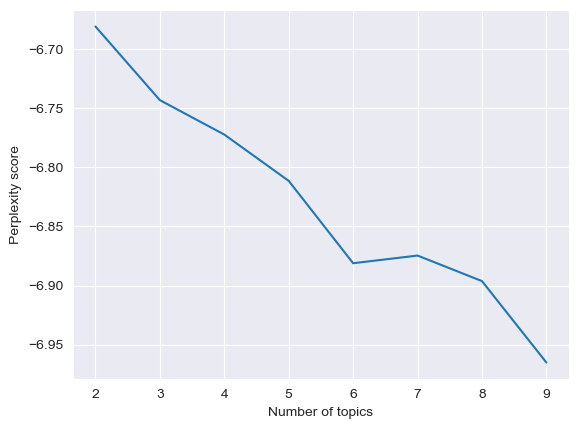

In [238]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [239]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [00:24<00:00,  3.03s/it]


Text(0, 0.5, 'Coherence score')

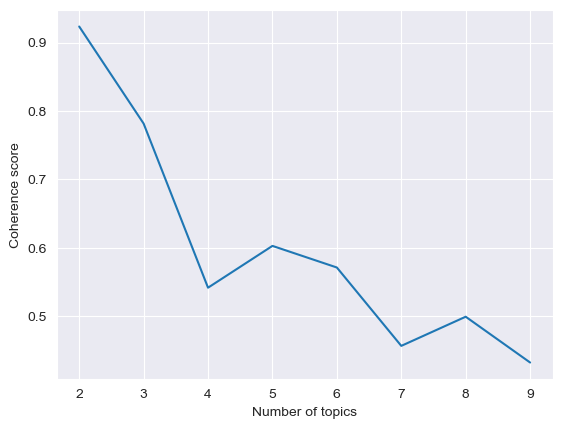

In [240]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [241]:
import numpy as np
from tqdm import tqdm

topic_num = 4
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster4.loc[:, 'action_cluster'] = action_align

df_cluster4


100%|██████████| 778/778 [00:00<00:00, 10365.32it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\2842808123.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster4.loc[:, 'action_cluster'] = action_align


,Title,tagged_review,vector,cluster,action_cluster
15,이번에 제가 소개드릴 저희 신혼집 가전은 바로바로 광파오븐입니다 엘지에서 갯수를 맞춰서 구매하면 할인을 많이 해준다고 하셔서 살짝 끼워넣을까 했던 제품이였는데,"[소개, 드릴, 신혼집, 갯수, 맞추다, 할인, 해주다, 살짝, 끼우다, 넣다]","[-0.01824826, -0.022626959, -0.0012886744, -0.015250745, 0.004676905, -0.0020472903, -0.010667069, -0.010299748, -0.0029760739, -0.0095835, -0.02043726, -0.013438666, -0.012318671, -0.009952834, 0.014198706, -0.007841376, -0.012180231, -0.009301218, -0.019155351, 0.018393375, -0.017423904, 0.017963095, -0.010956496, 0.023909682, 0.0027457883, 0.019349094, 0.014548169, 0.0025552681, 0.009320094, 0.012778427, -0.0033001062, -0.0149633875, -0.008282963, -0.008438634, 0.00933965, 0.009611204, 0.029318077, 0.014138625, 0.008014925, 0.01404448, 0.002625413, 0.0051662233, -0.0005531614, -0.022319678, -0.0053770514, 0.0068265568, -0.012233255, 0.027737703, 0.004732128, -0.020108286, -0.00042343768, -0.011844058, -0.0018887811, 0.0046199895, -0.025721697, -0.0016444509, 0.013620873, -0.016400803, 0.032973234, 0.00016452314, 0.0072045326, 0.01358678, 0.014462334, 0.0014409327, 0.027888723, -0.008158117, -0.006199472, 0.0043465835, -0.026530372, -0.023394583, 0.015826039, 0.0039080298, -0.0017212325, 0.019812213, -0.009163635, -0.0074180462, 0.0150804855, 0.004948367, 0.00788893, -0.0023914159, 0.003624876, 0.008726464, 0.013992482, -0.02188522, -0.02171784, 0.00017317804, 0.011858321, 0.013506353, -0.0048778635, -0.012848073, -0.0032523584, 0.023157302, 0.007612396, 0.01899449, -0.025195852, 0.007878678, -0.015280299, -0.01930773, 0.014992609, 0.00014518842]",4,0
28,광파오븐빌트인 알뜰하게 먼저 바쁘신 분들을 위해 미리 말씀드리면 광파오븐빌트인 알뜰정보는 아래 남겨드렸니 필요하신 분들은 참고해보시길 바랄게요,"[빌트, 알뜰하다, 먼저, 바쁘다, 위해, 미리, 말씀드리다, 빌트, 알뜰, 아래, 남기다, 드리다, 필요하다, 참고, 바라다]","[-0.009777515, -0.05329974, -0.0028892525, -0.0013134369, 0.0069856117, 0.028590225, -0.011306049, -0.050529152, 0.0039674533, 0.0117877545, 0.00577338, 0.019013667, -0.012129886, -0.028971232, 0.020463068, -0.00074289495, 9.401755e-05, -0.003970567, -0.042815134, 0.049719132, -0.0058522224, 0.011307529, -0.0020678942, 0.027430205, 0.008402124, 0.016193094, -0.0023123142, 0.018080488, 0.022541482, -0.0017931585, -0.03789705, -0.010766636, -0.007821356, 0.0056221895, 0.020569373, 0.028780024, 0.032458827, 0.0360011, 0.009529134, 0.05916101, 0.0007559985, 0.020921532, 0.026997335, -0.036342796, -0.015005894, 0.032603234, -0.025585832, 0.05029526, -0.002905294, -0.023870151, 0.0018018748, 0.024584388, 0.014987915, -0.0051689222, -0.012945616, 0.0017722514, 0.031131612, 0.0080858115, 0.038076546, -0.02054567, 0.0073334887, 0.0077144564, 0.019275712, -0.019664923, 0.05434582, -0.0070731947, -0.03985091, -0.01575913, -0.011436079, -0.053687666, 0.028492458, -0.0017659345, -0.038748033, 0.007901605, -0.028811263, -0.014962273, -0.005113079, 0.03018633, 0.027336873, -0.012016139, 0.0068003763, 0.00926061, 0.00978188, -0.013041003, -0.03442634, 0.022593893, 0.0025978552, -0.0023383047, -0.044326387, -0.019974966, -0.02502783, -0.00083618285, -0.022538316, 0.0048923567, -0.036881667, 0.00015505753, -0.01726871, -0.0059099877, -0.02063397, -0.015424044]",4,3
33,광파오븐은 전자에서 가전 견적받으면서 가장 고민했던 제품인데요 전자레인지 에어프라이어 토스터기 같은 소형가전들은 필요하긴 하지만 저희집은 부엌이 큰편이,"[견적, 고민, 토스터, 소형, 필요하다, 부엌, 크다, 편이]","[-0.0034014075, -0.0022274328, -0.008948242, -0.004543622, -0.00525146, -0.0015854286, -0.011256003, 0.007907491, -0.008016429, -0.010194162, -0.020959854, -0.02417228, -0.0016594537, -0.00060148444, 0.007837903, -0.003875436, -0.0048183375, -0.0026202113, -0.020532236, 0.0062107565, -0.012899204, 0.017464316, -0.0063345013, 0.010091782, -0.0017820529, 0.0059796646, 0.029786475, 0.0009047664, 0.0046029594, 0.0076827197, 0.021905202, 0.0075543537, 0.00036908104, -0.011278716, -0.0018839862, 0.016672615, 0.02151585, 0.008142366, 0.008381579, -5.615293e-05, 0.0033297953, -0.013156281, -0.008914598, -0.015085884, 0.004385843, -0.0028527603, -0.0014202984, 0.009149458, -0.004391983, -0.004481016, 0.0007949466, -0.02448421, -0.006285278, -0.013341278, -0.008135295, 0.000391

In [242]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster4.html')

In [243]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.013*"이르다" + 0.012*"할인" + 0.010*"주방" + 0.010*"품목" + 0.008*"기능" + 0.007*"상담" + 0.007*"쿠쿠" + 0.007*"인치" + 0.007*"조리" + 0.007*"설치"
Topic ID: 1, Description: 0.111*"할인" + 0.100*"가격" + 0.034*"설치" + 0.032*"판매" + 0.028*"적용" + 0.027*"인기" + 0.015*"빠르다" + 0.013*"주문" + 0.013*"도착" + 0.012*"핫딜중"
Topic ID: 2, Description: 0.043*"설치" + 0.023*"가격" + 0.015*"사용" + 0.014*"좋다" + 0.011*"크다" + 0.009*"블랙" + 0.008*"혜택" + 0.008*"저렴하다" + 0.008*"많다" + 0.008*"미스트"
Topic ID: 3, Description: 0.014*"리뷰" + 0.013*"기능" + 0.012*"할인" + 0.012*"좋다" + 0.012*"사용" + 0.011*"설치" + 0.010*"빌트" + 0.010*"최저" + 0.008*"소개" + 0.008*"매장"


In [244]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster4.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 1
    elif i == 2:
        n = 2
    else:
        n = 4
    new_action_topic.append(n)
df_cluster4.action_cluster = new_action_topic

100%|██████████| 778/778 [00:00<00:00, 778799.17it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\2944088786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster4.action_cluster = new_action_topic


# 클러스터 4 결과

In [245]:
df_cluster4

,Title,tagged_review,vector,cluster,action_cluster
15,이번에 제가 소개드릴 저희 신혼집 가전은 바로바로 광파오븐입니다 엘지에서 갯수를 맞춰서 구매하면 할인을 많이 해준다고 하셔서 살짝 끼워넣을까 했던 제품이였는데,"[소개, 드릴, 신혼집, 갯수, 맞추다, 할인, 해주다, 살짝, 끼우다, 넣다]","[-0.01824826, -0.022626959, -0.0012886744, -0.015250745, 0.004676905, -0.0020472903, -0.010667069, -0.010299748, -0.0029760739, -0.0095835, -0.02043726, -0.013438666, -0.012318671, -0.009952834, 0.014198706, -0.007841376, -0.012180231, -0.009301218, -0.019155351, 0.018393375, -0.017423904, 0.017963095, -0.010956496, 0.023909682, 0.0027457883, 0.019349094, 0.014548169, 0.0025552681, 0.009320094, 0.012778427, -0.0033001062, -0.0149633875, -0.008282963, -0.008438634, 0.00933965, 0.009611204, 0.029318077, 0.014138625, 0.008014925, 0.01404448, 0.002625413, 0.0051662233, -0.0005531614, -0.022319678, -0.0053770514, 0.0068265568, -0.012233255, 0.027737703, 0.004732128, -0.020108286, -0.00042343768, -0.011844058, -0.0018887811, 0.0046199895, -0.025721697, -0.0016444509, 0.013620873, -0.016400803, 0.032973234, 0.00016452314, 0.0072045326, 0.01358678, 0.014462334, 0.0014409327, 0.027888723, -0.008158117, -0.006199472, 0.0043465835, -0.026530372, -0.023394583, 0.015826039, 0.0039080298, -0.0017212325, 0.019812213, -0.009163635, -0.0074180462, 0.0150804855, 0.004948367, 0.00788893, -0.0023914159, 0.003624876, 0.008726464, 0.013992482, -0.02188522, -0.02171784, 0.00017317804, 0.011858321, 0.013506353, -0.0048778635, -0.012848073, -0.0032523584, 0.023157302, 0.007612396, 0.01899449, -0.025195852, 0.007878678, -0.015280299, -0.01930773, 0.014992609, 0.00014518842]",4,3
28,광파오븐빌트인 알뜰하게 먼저 바쁘신 분들을 위해 미리 말씀드리면 광파오븐빌트인 알뜰정보는 아래 남겨드렸니 필요하신 분들은 참고해보시길 바랄게요,"[빌트, 알뜰하다, 먼저, 바쁘다, 위해, 미리, 말씀드리다, 빌트, 알뜰, 아래, 남기다, 드리다, 필요하다, 참고, 바라다]","[-0.009777515, -0.05329974, -0.0028892525, -0.0013134369, 0.0069856117, 0.028590225, -0.011306049, -0.050529152, 0.0039674533, 0.0117877545, 0.00577338, 0.019013667, -0.012129886, -0.028971232, 0.020463068, -0.00074289495, 9.401755e-05, -0.003970567, -0.042815134, 0.049719132, -0.0058522224, 0.011307529, -0.0020678942, 0.027430205, 0.008402124, 0.016193094, -0.0023123142, 0.018080488, 0.022541482, -0.0017931585, -0.03789705, -0.010766636, -0.007821356, 0.0056221895, 0.020569373, 0.028780024, 0.032458827, 0.0360011, 0.009529134, 0.05916101, 0.0007559985, 0.020921532, 0.026997335, -0.036342796, -0.015005894, 0.032603234, -0.025585832, 0.05029526, -0.002905294, -0.023870151, 0.0018018748, 0.024584388, 0.014987915, -0.0051689222, -0.012945616, 0.0017722514, 0.031131612, 0.0080858115, 0.038076546, -0.02054567, 0.0073334887, 0.0077144564, 0.019275712, -0.019664923, 0.05434582, -0.0070731947, -0.03985091, -0.01575913, -0.011436079, -0.053687666, 0.028492458, -0.0017659345, -0.038748033, 0.007901605, -0.028811263, -0.014962273, -0.005113079, 0.03018633, 0.027336873, -0.012016139, 0.0068003763, 0.00926061, 0.00978188, -0.013041003, -0.03442634, 0.022593893, 0.0025978552, -0.0023383047, -0.044326387, -0.019974966, -0.02502783, -0.00083618285, -0.022538316, 0.0048923567, -0.036881667, 0.00015505753, -0.01726871, -0.0059099877, -0.02063397, -0.015424044]",4,4
33,광파오븐은 전자에서 가전 견적받으면서 가장 고민했던 제품인데요 전자레인지 에어프라이어 토스터기 같은 소형가전들은 필요하긴 하지만 저희집은 부엌이 큰편이,"[견적, 고민, 토스터, 소형, 필요하다, 부엌, 크다, 편이]","[-0.0034014075, -0.0022274328, -0.008948242, -0.004543622, -0.00525146, -0.0015854286, -0.011256003, 0.007907491, -0.008016429, -0.010194162, -0.020959854, -0.02417228, -0.0016594537, -0.00060148444, 0.007837903, -0.003875436, -0.0048183375, -0.0026202113, -0.020532236, 0.0062107565, -0.012899204, 0.017464316, -0.0063345013, 0.010091782, -0.0017820529, 0.0059796646, 0.029786475, 0.0009047664, 0.0046029594, 0.0076827197, 0.021905202, 0.0075543537, 0.00036908104, -0.011278716, -0.0018839862, 0.016672615, 0.02151585, 0.008142366, 0.008381579, -5.615293e-05, 0.0033297953, -0.013156281, -0.008914598, -0.015085884, 0.004385843, -0.0028527603, -0.0014202984, 0.009149458, -0.004391983, -0.004481016, 0.0007949466, -0.02448421, -0.006285278, -0.013341278, -0.008135295, 0.000391

# 클러스터 5

In [246]:
df_cluster5 = df[df["cluster"] == 5]
display(df_cluster5)
display(df_cluster5.shape)

,Title,tagged_review,vector,cluster
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고기 구이 치킨튀기기 고구마 굽기 계란찜 정도 같고 쿠키만들기도,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨, 튀기다, 고구마, 굽다, 계란찜, 쿠키, 만들기]","[-0.022420181, 0.033249963, -0.004551741, -0.0126496125, -0.014119522, -0.05576664, 0.010635385, 0.07991179, -0.01803132, -0.011526344, 0.00963468, -0.019497842, -0.0128908055, 0.035616472, -0.010269881, -0.011062572, 0.013400966, -0.013086324, 0.02753321, -0.04715108, 0.0044238805, -0.027270526, 0.014957107, -0.0120225, -0.014377824, -0.023125231, -0.0070702652, -0.055638343, 0.016671859, -0.008515775, 0.053649876, 0.043305356, -0.00922311, 0.015429048, 0.0011322442, -0.0061634714, -0.003328744, -0.045319173, -0.0042228475, -0.051703125, 0.0045438223, -0.01372608, -0.02727578, 0.022599593, 0.009796325, -0.005828503, 0.003052356, -0.042567067, 0.009448445, 0.053103484, 0.01874354, -0.017719802, 0.0009386777, 0.024858296, -0.017618358, 0.009121399, 0.0076282443, -0.013116708, -0.049212232, 0.03423803, -0.008997959, -0.018254777, -0.018243736, 0.02091385, -0.06904585, -0.0026082634, 0.056282792, 0.03755761, 0.013353897, 0.034094166, -0.016916621, -0.013403436, 0.023141207, 0.013460138, 0.022134157, 0.02394672, -0.007677046, -0.024032183, -0.043016985, 0.008927059, 0.007825908, 0.00677572, -0.02446943, 0.03375216, 0.017699122, -0.01022871, -0.018319236, 0.026186101, 0.024625337, 0.028695015, 0.046595387, 0.01233089, -0.0105690425, -0.013280019, 0.06040149, 0.030627068, 0.0054913736, -0.010972588, 0.01696137, -0.0053274403]",5
9,저희는 앞두고 신혼집을 꾸리는 재미에 살고있는 예비 부부 입니당 이번에 디오스 광파오븐을 사게되었는데요 일단 광파 오븐 금액이 생각보다 비싸서,"[앞두다, 신혼집, 꾸리다, 재미, 살다, 예비, 부부, 사다, 금액, 생각, 비싸다]","[-0.0025508965, 0.015959803, -0.006963937, -0.020895991, -0.006326387, -0.016735898, 0.0048125046, 0.037588075, -0.008861224, -0.018871315, -0.010181423, -0.01446576, -0.02188942, 0.018336166, 0.017003149, -0.011842205, 0.008902778, -0.025379213, -0.00090175506, -0.029558502, -0.011515776, -0.0020688607, 0.00919276, 0.019385437, 0.0023229495, -0.0050510005, 0.021558236, -0.02207992, 0.0065133506, 0.0010947497, 0.028991235, 0.009212283, -0.0038180233, 0.0061181136, -0.016022954, 0.021167977, 0.022193966, -0.023499936, 0.009328325, -0.037977684, 0.021306021, -0.013565161, -0.01651686, 0.0070648924, 0.0030080164, -0.0013765469, -0.025154086, -0.0028591866, 0.009876654, 0.025934832, -0.0042654322, -0.016115302, -0.009476137, 0.0073704836, -0.014971588, -0.0077500385, -0.008653294, 4.9127906e-05, -0.02976603, -0.0044743344, -0.0021336956, -0.015542393, -0.011003406, 0.0071608904, -0.02353455, -0.0077486774, 0.031254392, 0.020178216, -0.023731679, 0.02364952, 0.011388041, -0.009127508, -0.00967101, 0.0021367555, 0.002425212, 0.026756756, 0.0148728145, -0.014646772, 0.0071522696, 0.010618608, 0.0032216627, 0.0027478463, -0.010051949, 0.009166518, -0.0024311817, 0.0068771415, -0.017758496, 0.030126309, -0.007486149, 0.00097416353, 0.03671505, 0.0069799093, 0.008456663, 0.023436628, 0.012889806, 0.01561903, -0.002282522, -0.028123317, 0.015589525, -0.0082104895]",5
34,특히 매일 요리하는 가스렌지와 최애 광파 오븐 청소에는 더더욱 신경을 쓰고 있답니다 주방 청소용으로 추천 받은 가스렌지 기름때 제거에 효과좋은 다목적,"[매일, 요리, 가스렌지, 최애, 청소, 더욱, 신경, 주방, 청소, 추천, 가스렌지, 기름, 제거, 효과, 좋다, 목적]","[-0.009741227, 0.024736227, -0.0046249162, -0.008035969, 0.0010173579, -0.025535528, 0.01097923, 0.050821647, -0.020296551, -0.0052988715, 0.008334225, -0.008945745, -0.017853854, 0.00578301, 0.005853522, -0.0028673317, 0.018008038, -0.010209248, 0.0010176923, -0.028635722, -0.011036434, -0.020391205, 0.008272337, 0.008323098, -0.014359926, -0.016022472, -0.011412987, -0.023028659, -0.0024670647, -0.0016308323, 0.015597153, 0.026007075, -0.0077781826, 0.0057979915, -0.013112661, -0.0012016601, 0.015400143, -0.02377508, -0.00025472778, -0.017166017, 0.013510462, -0.006466336, -0.01428909, 0.0131795, 0.023840586, 0.00053285714, 0.0016414586, -0.018292204, 0.010031633, 0.038886815, -0.0120284315, -0.00545249, 0.014535245, 0.02101349, -0.0018378312, 0.0154021, 0.010209103, -0.00

(1931, 4)

In [247]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

all_docs = list(df_cluster5["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

3495

In [248]:
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

1931

In [249]:
from gensim.models import CoherenceModel

In [250]:
perplexity_values = []

for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

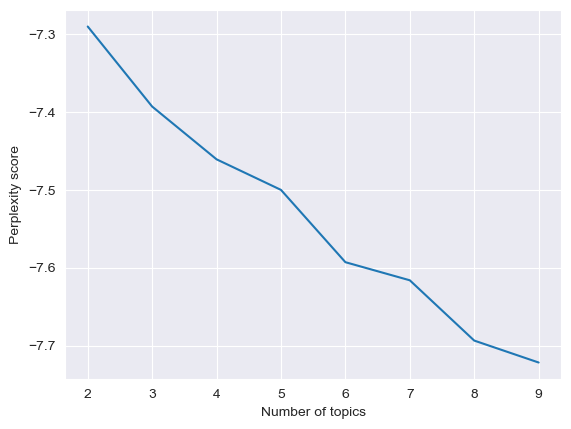

In [251]:
x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [252]:
coherence_values = []
for i in tqdm(range(2, 10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:03<00:00,  7.97s/it]


Text(0, 0.5, 'Coherence score')

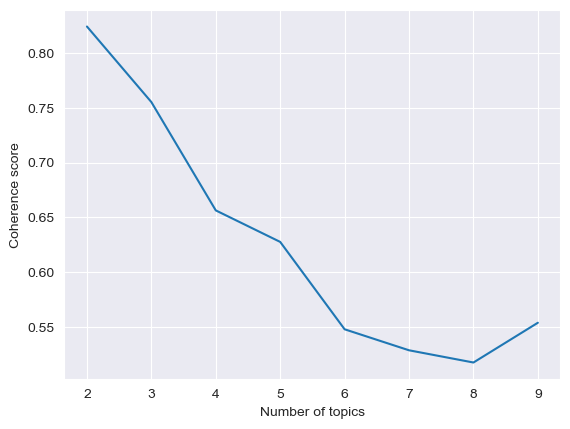

In [253]:
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [254]:
import numpy as np
from tqdm import tqdm

topic_num = 5
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary, random_state=1, passes=5)
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0])
        value.append(score[1])

    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

df_cluster5.loc[:, 'action_cluster'] = action_align

df_cluster5


100%|██████████| 1931/1931 [00:00<00:00, 9893.76it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\845001817.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster5.loc[:, 'action_cluster'] = action_align


,Title,tagged_review,vector,cluster,action_cluster
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고기 구이 치킨튀기기 고구마 굽기 계란찜 정도 같고 쿠키만들기도,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨, 튀기다, 고구마, 굽다, 계란찜, 쿠키, 만들기]","[-0.022420181, 0.033249963, -0.004551741, -0.0126496125, -0.014119522, -0.05576664, 0.010635385, 0.07991179, -0.01803132, -0.011526344, 0.00963468, -0.019497842, -0.0128908055, 0.035616472, -0.010269881, -0.011062572, 0.013400966, -0.013086324, 0.02753321, -0.04715108, 0.0044238805, -0.027270526, 0.014957107, -0.0120225, -0.014377824, -0.023125231, -0.0070702652, -0.055638343, 0.016671859, -0.008515775, 0.053649876, 0.043305356, -0.00922311, 0.015429048, 0.0011322442, -0.0061634714, -0.003328744, -0.045319173, -0.0042228475, -0.051703125, 0.0045438223, -0.01372608, -0.02727578, 0.022599593, 0.009796325, -0.005828503, 0.003052356, -0.042567067, 0.009448445, 0.053103484, 0.01874354, -0.017719802, 0.0009386777, 0.024858296, -0.017618358, 0.009121399, 0.0076282443, -0.013116708, -0.049212232, 0.03423803, -0.008997959, -0.018254777, -0.018243736, 0.02091385, -0.06904585, -0.0026082634, 0.056282792, 0.03755761, 0.013353897, 0.034094166, -0.016916621, -0.013403436, 0.023141207, 0.013460138, 0.022134157, 0.02394672, -0.007677046, -0.024032183, -0.043016985, 0.008927059, 0.007825908, 0.00677572, -0.02446943, 0.03375216, 0.017699122, -0.01022871, -0.018319236, 0.026186101, 0.024625337, 0.028695015, 0.046595387, 0.01233089, -0.0105690425, -0.013280019, 0.06040149, 0.030627068, 0.0054913736, -0.010972588, 0.01696137, -0.0053274403]",5,2
9,저희는 앞두고 신혼집을 꾸리는 재미에 살고있는 예비 부부 입니당 이번에 디오스 광파오븐을 사게되었는데요 일단 광파 오븐 금액이 생각보다 비싸서,"[앞두다, 신혼집, 꾸리다, 재미, 살다, 예비, 부부, 사다, 금액, 생각, 비싸다]","[-0.0025508965, 0.015959803, -0.006963937, -0.020895991, -0.006326387, -0.016735898, 0.0048125046, 0.037588075, -0.008861224, -0.018871315, -0.010181423, -0.01446576, -0.02188942, 0.018336166, 0.017003149, -0.011842205, 0.008902778, -0.025379213, -0.00090175506, -0.029558502, -0.011515776, -0.0020688607, 0.00919276, 0.019385437, 0.0023229495, -0.0050510005, 0.021558236, -0.02207992, 0.0065133506, 0.0010947497, 0.028991235, 0.009212283, -0.0038180233, 0.0061181136, -0.016022954, 0.021167977, 0.022193966, -0.023499936, 0.009328325, -0.037977684, 0.021306021, -0.013565161, -0.01651686, 0.0070648924, 0.0030080164, -0.0013765469, -0.025154086, -0.0028591866, 0.009876654, 0.025934832, -0.0042654322, -0.016115302, -0.009476137, 0.0073704836, -0.014971588, -0.0077500385, -0.008653294, 4.9127906e-05, -0.02976603, -0.0044743344, -0.0021336956, -0.015542393, -0.011003406, 0.0071608904, -0.02353455, -0.0077486774, 0.031254392, 0.020178216, -0.023731679, 0.02364952, 0.011388041, -0.009127508, -0.00967101, 0.0021367555, 0.002425212, 0.026756756, 0.0148728145, -0.014646772, 0.0071522696, 0.010618608, 0.0032216627, 0.0027478463, -0.010051949, 0.009166518, -0.0024311817, 0.0068771415, -0.017758496, 0.030126309, -0.007486149, 0.00097416353, 0.03671505, 0.0069799093, 0.008456663, 0.023436628, 0.012889806, 0.01561903, -0.002282522, -0.028123317, 0.015589525, -0.0082104895]",5,2
34,특히 매일 요리하는 가스렌지와 최애 광파 오븐 청소에는 더더욱 신경을 쓰고 있답니다 주방 청소용으로 추천 받은 가스렌지 기름때 제거에 효과좋은 다목적,"[매일, 요리, 가스렌지, 최애, 청소, 더욱, 신경, 주방, 청소, 추천, 가스렌지, 기름, 제거, 효과, 좋다, 목적]","[-0.009741227, 0.024736227, -0.0046249162, -0.008035969, 0.0010173579, -0.025535528, 0.01097923, 0.050821647, -0.020296551, -0.0052988715, 0.008334225, -0.008945745, -0.017853854, 0.00578301, 0.005853522, -0.0028673317, 0.018008038, -0.010209248, 0.0010176923, -0.028635722, -0.011036434, -0.020391205, 0.008272337, 0.008323098, -0.014359926, -0.016022472, -0.011412987, -0.023028659, -0.0024670647, -0.0016308323, 0.015597153, 0.026007075, -0.0077781826, 0.0057979915, -0.013112661, -0.0012016601, 0.015400143, -0.02377508, -0.00025472778, -0.017166017, 0.013510462, -0.006466336, -0.01428909, 0.0131795, 0.023840586, 0.00053285714, 0.0016414586, -0.018292204, 0.010031633, 0.038886815, -0.0120284315, -0.00545249, 0.014535245, 0.02101349, -0.0018378312, 0.0154021,

In [255]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'data/prepared_data_cluster5.html')

In [256]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.040*"좋다" + 0.020*"가격" + 0.013*"기능" + 0.013*"설치" + 0.012*"할인" + 0.012*"요리" + 0.008*"빠르다" + 0.008*"청소" + 0.007*"역시" + 0.007*"편하다"
Topic ID: 1, Description: 0.038*"좋다" + 0.029*"디자인" + 0.026*"기능" + 0.025*"사용" + 0.014*"요리" + 0.013*"깔끔하다" + 0.012*"이쁘다" + 0.011*"성능" + 0.011*"만족하다" + 0.010*"예쁘다"
Topic ID: 2, Description: 0.050*"기능" + 0.042*"사용" + 0.033*"좋다" + 0.014*"요리" + 0.013*"다양하다" + 0.008*"편리하다" + 0.008*"않다" + 0.007*"편하다" + 0.007*"생각" + 0.007*"많다"
Topic ID: 3, Description: 0.021*"주방" + 0.010*"혁신" + 0.008*"없다" + 0.007*"클릭" + 0.007*"좋다" + 0.006*"생각" + 0.006*"요리" + 0.005*"기능" + 0.005*"크다" + 0.005*"선택"
Topic ID: 4, Description: 0.015*"요리" + 0.009*"좋다" + 0.009*"사용" + 0.007*"맛있다" + 0.007*"않다" + 0.007*"아니다" + 0.007*"주방" + 0.006*"공간" + 0.006*"많다" + 0.006*"베이"


In [258]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster5.action_cluster):
    if i == 0:
        n = 3
    elif i == 1:
        n = 2
    elif i == 2:
        n = 1
    elif i == 3:
        n = 5
    else:
        n = 4
    new_action_topic.append(n)
df_cluster5.action_cluster = new_action_topic

100%|██████████| 1931/1931 [00:00<00:00, 1929759.60it/s]
C:\Users\dxschool\AppData\Local\Temp\ipykernel_24032\3543621196.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster5.action_cluster = new_action_topic


# 클러스터 5 결과

In [259]:
df_cluster5

,Title,tagged_review,vector,cluster,action_cluster
4,통합된 광파오븐이나 큐커가 좋다는 분들이 있어서 헷갈려요 햇반 돌리거나 생선구이 고기 구이 치킨튀기기 고구마 굽기 계란찜 정도 같고 쿠키만들기도,"[통합, 크다, 좋다, 헷갈리다, 햇반, 돌리다, 생선, 구이, 고기, 구이, 치킨, 튀기다, 고구마, 굽다, 계란찜, 쿠키, 만들기]","[-0.022420181, 0.033249963, -0.004551741, -0.0126496125, -0.014119522, -0.05576664, 0.010635385, 0.07991179, -0.01803132, -0.011526344, 0.00963468, -0.019497842, -0.0128908055, 0.035616472, -0.010269881, -0.011062572, 0.013400966, -0.013086324, 0.02753321, -0.04715108, 0.0044238805, -0.027270526, 0.014957107, -0.0120225, -0.014377824, -0.023125231, -0.0070702652, -0.055638343, 0.016671859, -0.008515775, 0.053649876, 0.043305356, -0.00922311, 0.015429048, 0.0011322442, -0.0061634714, -0.003328744, -0.045319173, -0.0042228475, -0.051703125, 0.0045438223, -0.01372608, -0.02727578, 0.022599593, 0.009796325, -0.005828503, 0.003052356, -0.042567067, 0.009448445, 0.053103484, 0.01874354, -0.017719802, 0.0009386777, 0.024858296, -0.017618358, 0.009121399, 0.0076282443, -0.013116708, -0.049212232, 0.03423803, -0.008997959, -0.018254777, -0.018243736, 0.02091385, -0.06904585, -0.0026082634, 0.056282792, 0.03755761, 0.013353897, 0.034094166, -0.016916621, -0.013403436, 0.023141207, 0.013460138, 0.022134157, 0.02394672, -0.007677046, -0.024032183, -0.043016985, 0.008927059, 0.007825908, 0.00677572, -0.02446943, 0.03375216, 0.017699122, -0.01022871, -0.018319236, 0.026186101, 0.024625337, 0.028695015, 0.046595387, 0.01233089, -0.0105690425, -0.013280019, 0.06040149, 0.030627068, 0.0054913736, -0.010972588, 0.01696137, -0.0053274403]",5,1
9,저희는 앞두고 신혼집을 꾸리는 재미에 살고있는 예비 부부 입니당 이번에 디오스 광파오븐을 사게되었는데요 일단 광파 오븐 금액이 생각보다 비싸서,"[앞두다, 신혼집, 꾸리다, 재미, 살다, 예비, 부부, 사다, 금액, 생각, 비싸다]","[-0.0025508965, 0.015959803, -0.006963937, -0.020895991, -0.006326387, -0.016735898, 0.0048125046, 0.037588075, -0.008861224, -0.018871315, -0.010181423, -0.01446576, -0.02188942, 0.018336166, 0.017003149, -0.011842205, 0.008902778, -0.025379213, -0.00090175506, -0.029558502, -0.011515776, -0.0020688607, 0.00919276, 0.019385437, 0.0023229495, -0.0050510005, 0.021558236, -0.02207992, 0.0065133506, 0.0010947497, 0.028991235, 0.009212283, -0.0038180233, 0.0061181136, -0.016022954, 0.021167977, 0.022193966, -0.023499936, 0.009328325, -0.037977684, 0.021306021, -0.013565161, -0.01651686, 0.0070648924, 0.0030080164, -0.0013765469, -0.025154086, -0.0028591866, 0.009876654, 0.025934832, -0.0042654322, -0.016115302, -0.009476137, 0.0073704836, -0.014971588, -0.0077500385, -0.008653294, 4.9127906e-05, -0.02976603, -0.0044743344, -0.0021336956, -0.015542393, -0.011003406, 0.0071608904, -0.02353455, -0.0077486774, 0.031254392, 0.020178216, -0.023731679, 0.02364952, 0.011388041, -0.009127508, -0.00967101, 0.0021367555, 0.002425212, 0.026756756, 0.0148728145, -0.014646772, 0.0071522696, 0.010618608, 0.0032216627, 0.0027478463, -0.010051949, 0.009166518, -0.0024311817, 0.0068771415, -0.017758496, 0.030126309, -0.007486149, 0.00097416353, 0.03671505, 0.0069799093, 0.008456663, 0.023436628, 0.012889806, 0.01561903, -0.002282522, -0.028123317, 0.015589525, -0.0082104895]",5,1
34,특히 매일 요리하는 가스렌지와 최애 광파 오븐 청소에는 더더욱 신경을 쓰고 있답니다 주방 청소용으로 추천 받은 가스렌지 기름때 제거에 효과좋은 다목적,"[매일, 요리, 가스렌지, 최애, 청소, 더욱, 신경, 주방, 청소, 추천, 가스렌지, 기름, 제거, 효과, 좋다, 목적]","[-0.009741227, 0.024736227, -0.0046249162, -0.008035969, 0.0010173579, -0.025535528, 0.01097923, 0.050821647, -0.020296551, -0.0052988715, 0.008334225, -0.008945745, -0.017853854, 0.00578301, 0.005853522, -0.0028673317, 0.018008038, -0.010209248, 0.0010176923, -0.028635722, -0.011036434, -0.020391205, 0.008272337, 0.008323098, -0.014359926, -0.016022472, -0.011412987, -0.023028659, -0.0024670647, -0.0016308323, 0.015597153, 0.026007075, -0.0077781826, 0.0057979915, -0.013112661, -0.0012016601, 0.015400143, -0.02377508, -0.00025472778, -0.017166017, 0.013510462, -0.006466336, -0.01428909, 0.0131795, 0.023840586, 0.00053285714, 0.0016414586, -0.018292204, 0.010031633, 0.038886815, -0.0120284315, -0.00545249, 0.014535245, 0.02101349, -0.0018378312, 0.0154021,

In [260]:
df_cluster0 = df_cluster0[['Title', 'cluster', 'action_cluster']]
df_cluster1 = df_cluster1[['Title', 'cluster', 'action_cluster']]
df_cluster2 = df_cluster2[['Title', 'cluster', 'action_cluster']]
df_cluster3 = df_cluster3[['Title', 'cluster', 'action_cluster']]
df_cluster4 = df_cluster4[['Title', 'cluster', 'action_cluster']]
df_cluster5 = df_cluster5[['Title', 'cluster', 'action_cluster']]
df_combined = pd.concat([df_cluster0, df_cluster1, df_cluster2, df_cluster3, df_cluster4, df_cluster5],
                        ignore_index=True)
df_combined

,Title,cluster,action_cluster
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,0,2
1,월에 캐나다로 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,0,2
2,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 있게,0,3
3,생선굽거나 닭봉구이 정도 하려면 뭐가 나을까요 엘지광파오븐 쿠진아트에어프라이어 요즘 좋은 제품 많던데 실제 쓰신 분들 조언 부탁드려요,0,2
4,이게 제가 쓰는 엘지 광파오븐입니다 거의 엘지 광파오븐 시조새 모델에 가깝습니다 년도 됐는데 아마 정도 같습니다 당시 만원 안되게 주고,0,4
...,...,...,...
7915,진정성 느껴져서 믿음이 갑니다,5,2
7916,로스트 치킨 미쳤다,5,4
7917,일찍 달려왔죠,5,4
7918,엘지오브제광파오븐제품 빌트인제품이 따로 있나요,5,2


In [265]:
df_combined.to_csv("data/클러스터_분석완료.csv", index=False)

In [261]:
import json

with open('../SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    senti_dict = json.load(f)
senti_dict

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

In [262]:
def sentiment_score(sent_dicts, token_list):
    result_list = []
    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result = dict['polarity'], dict['word']
                result_list.append(result)
    return result_list

In [263]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)

    tagged_list = []
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb', 'VerbPrefix']:
            tagged_list.append(word)
    return tagged_list

In [264]:
sentiment = []
for i in tqdm(df_combined['Title']):
    token = okt_pos_tagging(i)
    score = sentiment_score(senti_dict, token)
    sentiment.append(score)
sentiment

100%|██████████| 7920/7920 [02:44<00:00, 48.01it/s] 


[[],
 [('2', '많다'), ('2', '좋다')],
 [('1', '괜찮다')],
 [('2', '좋다'), ('2', '많다')],
 [],
 [('-1', '소음'), ('-2', '불편하다'), ('1', '기대')],
 [],
 [('1', '갖추다'), ('0', '못')],
 [('-1', '없다'), ('1', '다양하다'), ('2', '좋다')],
 [('2', '좋다'), ('-2', '해')],
 [('-1', '없다'), ('2', '유용하다'), ('-2', '비싸다')],
 [('1', '필수')],
 [('2', '좋아지다'), ('2', '많다'), ('2', '좋다')],
 [('2', '가능하다')],
 [('1', '괜찮다')],
 [],
 [('1', '괜찮다')],
 [],
 [],
 [],
 [('1', '괜찮다')],
 [('1', '인기')],
 [('-2', '아니다'), ('1', '받다')],
 [],
 [],
 [],
 [('1', '괜찮다')],
 [('2', '가능하다')],
 [],
 [('-1', '없다')],
 [('1', '받다'), ('2', '유용하다'), ('2', '만족스럽다')],
 [],
 [],
 [('1', '크다'), ('1', '괜찮다')],
 [('1', '인기')],
 [('-1', '없다'), ('1', '괜찮다'), ('-2', '걱정')],
 [('-2', '불편하다'), ('-1', '없다')],
 [],
 [],
 [('1', '괜찮다')],
 [('-1', '덥다')],
 [],
 [],
 [('-1', '없다')],
 [('2', '많다')],
 [('2', '좋아하다')],
 [('-2', '싫다'), ('2', '고르다')],
 [],
 [],
 [('2', '많다'), ('1', '저렴하다')],
 [('2', '많다'), ('1', '저렴하다')],
 [('-2', '안타깝다')],
 [('-2', '비싸다')],
 [],
 [('2', '맛있다'),

In [266]:
#감성점수 평균구하기
sentiment_score = []
for sent in tqdm(sentiment):
    score = []
    for s in sent:
        score.append(int(s[0]))

    #감성 점수가 잡히지 않은 리스트는 len이 0
    if len(score) == 0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))
sentiment_score

100%|██████████| 7920/7920 [00:00<00:00, 246705.44it/s]


[0,
 2.0,
 1.0,
 2.0,
 0,
 -0.6666666666666666,
 0,
 0.5,
 0.6666666666666666,
 0.0,
 -0.3333333333333333,
 1.0,
 2.0,
 2.0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 1.0,
 -0.5,
 0,
 0,
 0,
 1.0,
 2.0,
 0,
 -1.0,
 1.6666666666666667,
 0,
 0,
 1.0,
 1.0,
 -0.6666666666666666,
 -1.5,
 0,
 0,
 1.0,
 -1.0,
 0,
 0,
 -1.0,
 2.0,
 2.0,
 0.0,
 0,
 0,
 1.5,
 1.5,
 -2.0,
 -2.0,
 0,
 2.0,
 0,
 -1.3333333333333333,
 1.5,
 1.5,
 0,
 1.5,
 0,
 2.0,
 0,
 -1.0,
 0,
 1.5,
 0,
 -0.5,
 1.0,
 0,
 2.0,
 0,
 1.5,
 -2.0,
 1.5,
 0,
 -1.0,
 0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0,
 0,
 -1.0,
 1.0,
 0,
 1.5,
 2.0,
 -2.0,
 1.0,
 0.6666666666666666,
 2.0,
 1.5,
 -1.0,
 0,
 -1.0,
 1.0,
 0,
 0,
 0,
 0.5,
 0,
 2.0,
 1.0,
 1.0,
 2.0,
 -2.0,
 1.5,
 1.0,
 0,
 1.0,
 2.0,
 1.5,
 2.0,
 0,
 2.0,
 1.0,
 -1.5,
 0,
 1.5,
 0,
 0,
 0,
 1.0,
 0,
 0,
 -1.0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 1.0,
 0,
 0.5,
 -1.3333333333333333,
 1.0,
 0,
 0,
 0,
 0,
 2.0,
 0.6666666666666666,
 1.5,
 -2.0,
 2.0,
 0,
 0,
 0,
 1.5,
 1.5,
 0,
 -2.0,
 0,
 0,
 0,
 2.0

In [267]:
df_combined['sentiment_score'] = sentiment_score
df_combined.action_cluster.unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [268]:
action_sents = dict()
for actor in df_combined.cluster.unique():
    actor_df = df_combined[df_combined['cluster'] == actor]

    for i in actor_df.action_cluster.unique():
        action_score = actor_df[actor_df['action_cluster'] == i].sentiment_score
        action_score = np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, i)] = action_score
action_sents

{'Actor0_Action2': 1.2448755528129178,
 'Actor0_Action3': 0.5465939153439154,
 'Actor0_Action4': 0.6053104620701187,
 'Actor0_Action1': 1.0733633851586373,
 'Actor1_Action3': 0.7036879966491618,
 'Actor1_Action2': 0.7831876774278735,
 'Actor1_Action1': 0.5170871385636486,
 'Actor2_Action6': 0.7121399176954732,
 'Actor2_Action5': 0.5066456301396061,
 'Actor2_Action3': 0.7315305709826019,
 'Actor2_Action2': 0.7197287201153181,
 'Actor2_Action1': 0.4953413479431579,
 'Actor2_Action4': 0.9034653031866656,
 'Actor3_Action2': 0.8845007829050382,
 'Actor3_Action1': 1.0355522335187408,
 'Actor3_Action3': 0.7257415957290644,
 'Actor4_Action3': 0.5716023635731664,
 'Actor4_Action4': 0.7204666666666667,
 'Actor4_Action2': 0.5640072403230298,
 'Actor4_Action1': 0.8572360248447205,
 'Actor5_Action1': 0.9341869680564533,
 'Actor5_Action3': 0.8208316935589662,
 'Actor5_Action5': 0.5123255813953489,
 'Actor5_Action2': 1.1310847485847486,
 'Actor5_Action4': 0.31486347200632914}

In [269]:
from sklearn.preprocessing import MinMaxScaler

data = action_sents.values()

data = np.array(list(data)).reshape(-1, 1)
data

array([[1.24487555],
       [0.54659392],
       [0.60531046],
       [1.07336339],
       [0.703688  ],
       [0.78318768],
       [0.51708714],
       [0.71213992],
       [0.50664563],
       [0.73153057],
       [0.71972872],
       [0.49534135],
       [0.9034653 ],
       [0.88450078],
       [1.03555223],
       [0.7257416 ],
       [0.57160236],
       [0.72046667],
       [0.56400724],
       [0.85723602],
       [0.93418697],
       [0.82083169],
       [0.51232558],
       [1.13108475],
       [0.31486347]])

In [270]:
scaler = MinMaxScaler(feature_range=(-10, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 10.        ],
       [ -5.01661434],
       [ -3.75390931],
       [  6.3116142 ],
       [ -1.63829089],
       [  0.07135746],
       [ -5.65116044],
       [ -1.4565315 ],
       [ -5.87570609],
       [ -1.03953362],
       [ -1.29333357],
       [ -6.11880577],
       [  2.65793947],
       [  2.25010562],
       [  5.49848172],
       [ -1.1640261 ],
       [ -4.47880524],
       [ -1.27746396],
       [ -4.6421391 ],
       [  1.66377435],
       [  3.31861185],
       [  0.88089568],
       [ -5.75355819],
       [  7.55291772],
       [-10.        ]])

In [271]:
sents_df = pd.DataFrame(action_sents.keys(), columns=['Action'])
sents_df['satisfaction'] = transformed_data
sents_df

,Action,satisfaction
0,Actor0_Action2,10.000000
1,Actor0_Action3,-5.016614
2,Actor0_Action4,-3.753909
3,Actor0_Action1,6.311614
4,Actor1_Action3,-1.638291
5,Actor1_Action2,0.071357
6,Actor1_Action1,-5.651160
7,Actor2_Action6,-1.456532
8,Actor2_Action5,-5.875706
9,Actor2_Action3,-1.039534


In [272]:
from collections import Counter

importance_check = []
for actor, action in zip(df_combined['cluster'], df_combined['action_cluster']):
    importance_check.append('Actor' + str(actor) + '_' + 'Action' + str(action))
importance_check

['Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Act

In [273]:
freq = Counter(importance_check)
freq

Counter({'Actor0_Action1': 1011,
         'Actor0_Action2': 926,
         'Actor0_Action3': 576,
         'Actor5_Action2': 550,
         'Actor5_Action1': 544,
         'Actor0_Action4': 466,
         'Actor1_Action1': 447,
         'Actor1_Action2': 396,
         'Actor5_Action3': 363,
         'Actor4_Action1': 345,
         'Actor1_Action3': 309,
         'Actor5_Action4': 259,
         'Actor5_Action5': 215,
         'Actor3_Action1': 209,
         'Actor3_Action2': 188,
         'Actor4_Action2': 171,
         'Actor4_Action3': 137,
         'Actor3_Action3': 126,
         'Actor4_Action4': 125,
         'Actor2_Action1': 117,
         'Actor2_Action2': 97,
         'Actor2_Action4': 95,
         'Actor2_Action3': 84,
         'Actor2_Action5': 83,
         'Actor2_Action6': 81})

In [274]:
importance_dict = dict()

total_count = len(importance_check)
for item, value in freq.items():
    importance = (value / total_count) * 100
    importance_dict[item] = importance
importance_dict

{'Actor0_Action2': 11.691919191919192,
 'Actor0_Action3': 7.2727272727272725,
 'Actor0_Action4': 5.883838383838383,
 'Actor0_Action1': 12.765151515151516,
 'Actor1_Action3': 3.901515151515152,
 'Actor1_Action2': 5.0,
 'Actor1_Action1': 5.6439393939393945,
 'Actor2_Action6': 1.0227272727272727,
 'Actor2_Action5': 1.047979797979798,
 'Actor2_Action3': 1.0606060606060608,
 'Actor2_Action2': 1.224747474747475,
 'Actor2_Action1': 1.4772727272727273,
 'Actor2_Action4': 1.1994949494949494,
 'Actor3_Action2': 2.3737373737373737,
 'Actor3_Action1': 2.638888888888889,
 'Actor3_Action3': 1.5909090909090908,
 'Actor4_Action3': 1.72979797979798,
 'Actor4_Action4': 1.5782828282828283,
 'Actor4_Action2': 2.159090909090909,
 'Actor4_Action1': 4.356060606060606,
 'Actor5_Action1': 6.8686868686868685,
 'Actor5_Action3': 4.583333333333333,
 'Actor5_Action5': 2.714646464646465,
 'Actor5_Action2': 6.944444444444445,
 'Actor5_Action4': 3.2702020202020203}

In [275]:
data = importance_dict.values()

data = np.array(list(data)).reshape(-1, 1)
data

array([[11.69191919],
       [ 7.27272727],
       [ 5.88383838],
       [12.76515152],
       [ 3.90151515],
       [ 5.        ],
       [ 5.64393939],
       [ 1.02272727],
       [ 1.0479798 ],
       [ 1.06060606],
       [ 1.22474747],
       [ 1.47727273],
       [ 1.19949495],
       [ 2.37373737],
       [ 2.63888889],
       [ 1.59090909],
       [ 1.72979798],
       [ 1.57828283],
       [ 2.15909091],
       [ 4.35606061],
       [ 6.86868687],
       [ 4.58333333],
       [ 2.71464646],
       [ 6.94444444],
       [ 3.27020202]])

In [276]:
scaler = MinMaxScaler(feature_range=(0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 9.08602151],
       [ 5.32258065],
       [ 4.13978495],
       [10.        ],
       [ 2.4516129 ],
       [ 3.38709677],
       [ 3.93548387],
       [ 0.        ],
       [ 0.02150538],
       [ 0.03225806],
       [ 0.17204301],
       [ 0.38709677],
       [ 0.15053763],
       [ 1.15053763],
       [ 1.37634409],
       [ 0.48387097],
       [ 0.60215054],
       [ 0.47311828],
       [ 0.96774194],
       [ 2.83870968],
       [ 4.97849462],
       [ 3.03225806],
       [ 1.44086022],
       [ 5.04301075],
       [ 1.91397849]])

In [277]:
sents_df['importance'] = transformed_data
sents_df

,Action,satisfaction,importance
0,Actor0_Action2,10.000000,9.086022
1,Actor0_Action3,-5.016614,5.322581
2,Actor0_Action4,-3.753909,4.139785
3,Actor0_Action1,6.311614,10.000000
4,Actor1_Action3,-1.638291,2.451613
5,Actor1_Action2,0.071357,3.387097
6,Actor1_Action1,-5.651160,3.935484
7,Actor2_Action6,-1.456532,0.000000
8,Actor2_Action5,-5.875706,0.021505
9,Actor2_Action3,-1.039534,0.032258


In [278]:
def Opportunity_score(satisfaction, importance):
    return importance + max(0, satisfaction - importance)

In [279]:
opportunity_list = []
for s, i in zip(sents_df['satisfaction'], sents_df['importance']):
    score_result = Opportunity_score(s, i)
    opportunity_list.append(score_result)
sents_df['opportunity'] = opportunity_list
sents_df.to_csv('data/opportunity_score_df.csv', index=False)
sents_df

,Action,satisfaction,importance,opportunity
0,Actor0_Action2,10.000000,9.086022,10.000000
1,Actor0_Action3,-5.016614,5.322581,5.322581
2,Actor0_Action4,-3.753909,4.139785,4.139785
3,Actor0_Action1,6.311614,10.000000,10.000000
4,Actor1_Action3,-1.638291,2.451613,2.451613
5,Actor1_Action2,0.071357,3.387097,3.387097
6,Actor1_Action1,-5.651160,3.935484,3.935484
7,Actor2_Action6,-1.456532,0.000000,0.000000
8,Actor2_Action5,-5.875706,0.021505,0.021505
9,Actor2_Action3,-1.039534,0.032258,0.032258


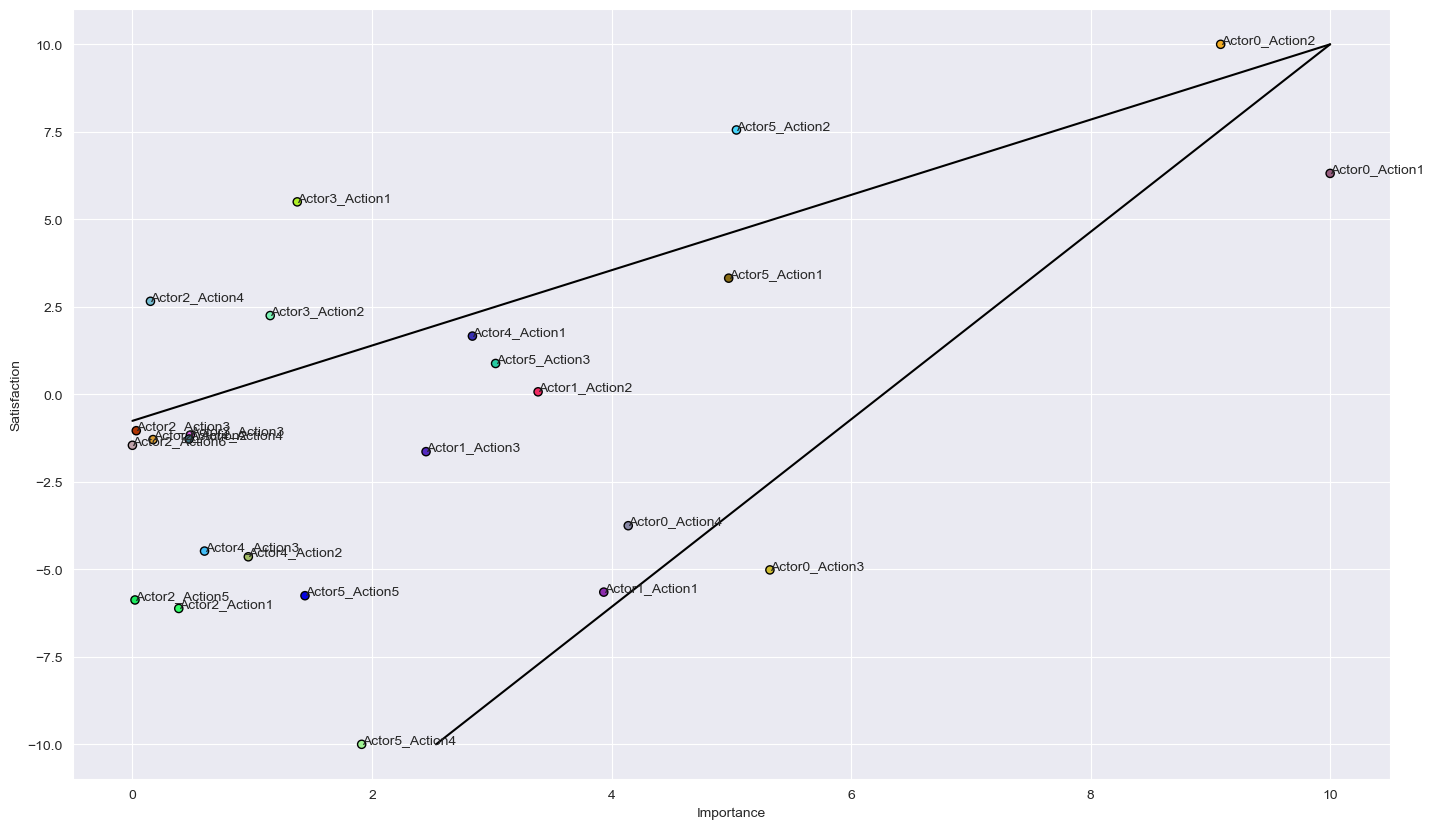

In [280]:
colors = np.random.rand(len(sents_df.Action), 3)
satisfaction = sents_df.satisfaction
importance = sents_df.importance
actions = sents_df.Action
plt.figure(figsize=(17, 10))
plt.scatter(importance, satisfaction, s=35, c=colors, edgecolors='black')  #s는 점의 사이

xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

x_data = [importance.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, 'k')

for i, action in enumerate(actions):
    plt.text(importance[i], satisfaction[i], action, fontsize=10)

plt.savefig('data/opportunity_area.png')

In [281]:
df_combined

,Title,cluster,action_cluster,sentiment_score
0,예전에 가스 오븐만 사용해봤는데 이사오니 가스레인지밑에 전기광파오븐이 설치되어있는데 빵이나 케이크 구울수 있나요 광파오븐은 첨이라 간단한거 몇개 해보긴했는데,0,2,0.0
1,월에 캐나다로 예정입니다 집에 디오스 광파오븐 있는데 이게 전자레인지 오븐 에어프라이어 기능이 많아서 좋긴한데 캐나다 전압이 달라서 가져가면,0,2,2.0
2,집에 에어프라이어 오븐과 디오스 광파오븐 전자레인지회전함 아파트 옵션이 있는데 에어프라이어 오븐은 예전부터 쓰던거라 괜찮은데 이사 오면서 있게,0,3,1.0
3,생선굽거나 닭봉구이 정도 하려면 뭐가 나을까요 엘지광파오븐 쿠진아트에어프라이어 요즘 좋은 제품 많던데 실제 쓰신 분들 조언 부탁드려요,0,2,2.0
4,이게 제가 쓰는 엘지 광파오븐입니다 거의 엘지 광파오븐 시조새 모델에 가깝습니다 년도 됐는데 아마 정도 같습니다 당시 만원 안되게 주고,0,4,0.0
...,...,...,...,...
7915,진정성 느껴져서 믿음이 갑니다,5,2,1.0
7916,로스트 치킨 미쳤다,5,4,0.0
7917,일찍 달려왔죠,5,4,0.0
7918,엘지오브제광파오븐제품 빌트인제품이 따로 있나요,5,2,0.0


In [168]:
df_result = df_combined[(df_combined['action_cluster'] == 2) & (df_combined['cluster'].isin([0, 1, 3]))]
df_result.to_csv('data/result.csv', index=False)